In [ ]:
# Load and explore the vivli_sentry dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# Load the dataset
df = pd.read_excel('vivli_sentry_2010_2023.xlsx')

print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())

In [ ]:
# Explore the dataset structure and identify key columns
print("Column names and data types:")
print(df.dtypes)
print("\nUnique species:")
print(df['Species'].value_counts())
print("\nYear range:")
print("Years:", sorted(df['Year'].unique()))
print("\nCountries represented:")
print("Number of countries:", df['Country'].nunique())
print(df['Country'].value_counts().head(20))

In [ ]:
candida_species = ['Candida albicans', 'Candida glabrata', 'Candida parapsilosis',
                   'Candida tropicalis', 'Candida krusei', 'Candida dubliniensis',
                   'Candida lusitaniae', 'Candida kefyr', 'Candida orthopsilosis',
                   'Candida guilliermondii']

candida_df1 = df[df['Species'].isin(candida_species)].copy()
print("\nUnique species:")
print(candida_df1['Species'].value_counts())

In [ ]:
candida_df1.to_csv('candida_df1.csv', index=False)

In [11]:
# Analyze resistance trends over time for key antifungals
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

candida_df1 = pd.read_csv('candida_df1.csv')

# Define key antifungals for analysis
key_antifungals = ['Fluconazole (CLSI)_I', 'Voriconazole (CLSI)_I', 'Caspofungin (CLSI)_I',
                   'Micafungin (CLSI)_I', 'Anidulafungin (CLSI)_I']

# Calculate resistance rates by year for each antifungal
resistance_trends = {}

for antifungal in key_antifungals:
    yearly_resistance = []
    for year in sorted(candida_df1['Year'].unique()):
        year_data = candida_df1[candida_df1['Year'] == year]
        total_tested = year_data[antifungal].notna().sum()
        resistant = year_data[antifungal].isin(['Resistant', 'Intermediate']).sum()

        if total_tested > 0:
            resistance_rate = (resistant / total_tested) * 100
        else:
            resistance_rate = 0

        yearly_resistance.append({
            'Year': year,
            'Antifungal': antifungal.replace(' (CLSI)_I', ''),
            'Resistance_Rate': resistance_rate,
            'Total_Tested': total_tested,
            'Resistant_Count': resistant
        })

    resistance_trends[antifungal] = yearly_resistance

# Create comprehensive resistance trends dataframe
all_trends = []
for antifungal, trends in resistance_trends.items():
    all_trends.extend(trends)

trends_df = pd.DataFrame(all_trends)
print("Resistance trends summary:")
print(trends_df.head(50))

Resistance trends summary:
    Year    Antifungal  Resistance_Rate  Total_Tested  Resistant_Count
0   2010   Fluconazole        20.055905          1431              287
1   2011   Fluconazole        23.249300          1428              332
2   2012   Fluconazole        22.663723          1359              308
3   2013   Fluconazole        21.380345          1333              285
4   2014   Fluconazole        21.819714          1187              259
5   2015   Fluconazole        21.851290          1318              288
6   2016   Fluconazole        24.449686          1272              311
7   2017   Fluconazole        22.356739          1239              277
8   2018   Fluconazole        22.372881          1180              264
9   2019   Fluconazole        24.465886          1451              355
10  2020   Fluconazole        26.587579          1433              381
11  2021   Fluconazole        27.986348          1465              410
12  2022   Fluconazole        27.539196          1

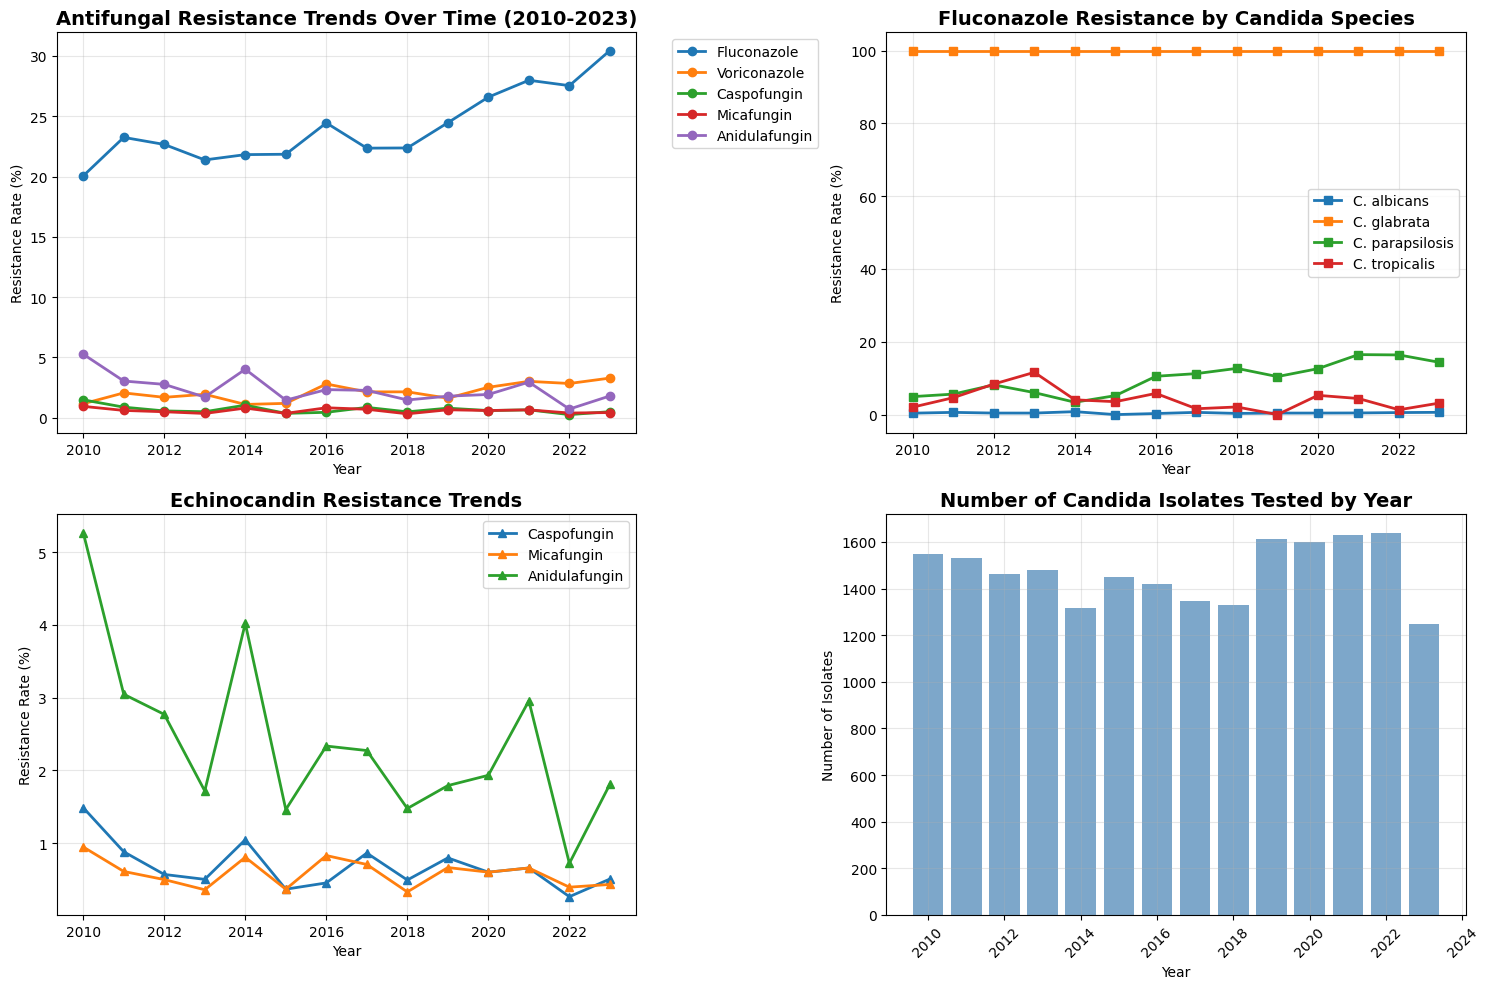

Resistance trend analysis completed


In [12]:
# Create comprehensive resistance trend visualizations
plt.figure(figsize=(15, 10))

# Plot 1: Overall resistance trends by antifungal over time
plt.subplot(2, 2, 1)
for antifungal in trends_df['Antifungal'].unique():
    antifungal_data = trends_df[trends_df['Antifungal'] == antifungal]
    plt.plot(antifungal_data['Year'], antifungal_data['Resistance_Rate'],
             marker='o', linewidth=2, label=antifungal)

plt.title('Antifungal Resistance Trends Over Time (2010-2023)', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Resistance Rate (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

# Plot 2: Species-specific fluconazole resistance
plt.subplot(2, 2, 2)
fluconazole_by_species = []
for species in ['Candida albicans', 'Candida glabrata', 'Candida parapsilosis', 'Candida tropicalis']:
    for year in sorted(candida_df1['Year'].unique()):
        species_year_data = candida_df1[(candida_df1['Species'] == species) & (candida_df1['Year'] == year)]
        total_tested = species_year_data['Fluconazole (CLSI)_I'].notna().sum()
        resistant = species_year_data['Fluconazole (CLSI)_I'].isin(['Resistant', 'Intermediate']).sum()

        if total_tested > 10:  # Only include if sufficient sample size
            resistance_rate = (resistant / total_tested) * 100
            fluconazole_by_species.append({
                'Year': year,
                'Species': species.replace('Candida ', 'C. '),
                'Resistance_Rate': resistance_rate
            })

fluconazole_species_df = pd.DataFrame(fluconazole_by_species)

for species in fluconazole_species_df['Species'].unique():
    species_data = fluconazole_species_df[fluconazole_species_df['Species'] == species]
    plt.plot(species_data['Year'], species_data['Resistance_Rate'],
             marker='s', linewidth=2, label=species)

plt.title('Fluconazole Resistance by Candida Species', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Resistance Rate (%)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: Echinocandin resistance trends (combined)
plt.subplot(2, 2, 3)
echinocandins = ['Caspofungin', 'Micafungin', 'Anidulafungin']
for drug in echinocandins:
    drug_data = trends_df[trends_df['Antifungal'] == drug]
    plt.plot(drug_data['Year'], drug_data['Resistance_Rate'],
             marker='^', linewidth=2, label=drug)

plt.title('Echinocandin Resistance Trends', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Resistance Rate (%)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 4: Sample sizes over time
plt.subplot(2, 2, 4)
yearly_samples = candida_df1.groupby('Year').size()
plt.bar(yearly_samples.index, yearly_samples.values, alpha=0.7, color='steelblue')
plt.title('Number of Candida Isolates Tested by Year', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Number of Isolates')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Resistance trend analysis completed")

In [7]:
# Create a comprehensive resistance summary table for clinical reference
import pandas as pd


candida_df2 = pd.read_csv('candida_df2.csv')

candida_species = ['Candida albicans', 'Candida glabrata', 'Candida parapsilosis',
                   'Candida tropicalis', 'Candida krusei']

# Create summary table by species and antifungal
summary_data = []

antifungals = ['Fluconazole (CLSI)_I', 'Voriconazole (CLSI)_I', 'Caspofungin (CLSI)_I',
               'Micafungin (CLSI)_I', 'Anidulafungin (CLSI)_I']

for species in candida_species:
    species_data = candida_df2[candida_df2['Species'] == species]

    for antifungal in antifungals:
        total_tested = species_data[antifungal].notna().sum()
        resistant = species_data[antifungal].isin(['Resistant', 'Intermediate']).sum()
        susceptible = species_data[antifungal].isin(['Susceptible']).sum()

        if total_tested > 0:
            resistance_rate = (resistant / total_tested) * 100
            susceptible_rate = (susceptible / total_tested) * 100
        else:
            resistance_rate = 0
            susceptible_rate = 0

        summary_data.append({
            'Species': species.replace('Candida ', 'C. '),
            'Antifungal': antifungal.replace(' (CLSI)_I', ''),
            'Total_Tested': total_tested,
            'Susceptible_Rate': round(susceptible_rate, 1),
            'Resistance_Rate': round(resistance_rate, 1),
            'Clinical_Recommendation': 'First-line' if resistance_rate < 5 else 'Consider alternatives'
        })

summary_df = pd.DataFrame(summary_data)

# Create pivot table for better visualization
pivot_resistance = summary_df.pivot(index='Species', columns='Antifungal', values='Resistance_Rate')
pivot_susceptible = summary_df.pivot(index='Species', columns='Antifungal', values='Susceptible_Rate')

print("Resistance Rates (%) by Species and Antifungal:")
print(pivot_resistance.round(1))
print("\nSusceptible Rates (%) by Species and Antifungal:")
print(pivot_susceptible.round(1))

# Save detailed summary
summary_df.to_csv('candida_resistance_summary.csv', index=False)
print(f"\nDetailed summary saved to candida_resistance_summary.csv")

# Create treatment recommendation matrix
treatment_matrix = []
for species in candida_species:
    species_short = species.replace('Candida ', 'C. ')
    species_data = summary_df[summary_df['Species'] == species_short]

    # Get resistance rates for key drugs
    fluconazole_res = species_data[species_data['Antifungal'] == 'Fluconazole']['Resistance_Rate'].iloc[0]
    caspofungin_res = species_data[species_data['Antifungal'] == 'Caspofungin']['Resistance_Rate'].iloc[0]

    # Determine recommendations
    if fluconazole_res < 5:
        first_line = "Fluconazole or Echinocandin"
    else:
        first_line = "Echinocandin preferred"

    treatment_matrix.append({
        'Species': species_short,
        'Fluconazole_Resistance': f"{fluconazole_res}%",
        'Echinocandin_Resistance': f"{caspofungin_res}%",
        'Recommended_First_Line': first_line
    })

treatment_df = pd.DataFrame(treatment_matrix)
print("\nTreatment Recommendations Based on Resistance Patterns:")
print(treatment_df)

Resistance Rates (%) by Species and Antifungal:
Antifungal       Anidulafungin  Caspofungin  Fluconazole  Micafungin  \
Species                                                                
C. albicans                0.1          0.2          0.4         0.2   
C. glabrata                3.7          2.5        100.0         2.0   
C. krusei                  0.3          1.3          0.0         0.3   
C. parapsilosis            8.6          0.0          9.8         0.2   
C. tropicalis              0.2          0.2          4.1         0.2   

Antifungal       Voriconazole  
Species                        
C. albicans               0.2  
C. glabrata               0.0  
C. krusei                 2.8  
C. parapsilosis           6.2  
C. tropicalis             3.9  

Susceptible Rates (%) by Species and Antifungal:
Antifungal       Anidulafungin  Caspofungin  Fluconazole  Micafungin  \
Species                                                                
C. albicans               99.

In [21]:
# Calculate antifungal resistance rates by country and year for key antifungals
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data

candida_df3 = pd.read_csv('candida_df3.csv')
candida_species = ['Candida albicans', 'Candida glabrata', 'Candida parapsilosis',
                   'Candida tropicalis', 'Candida krusei']

# Get top countries by sample size
top_countries = candida_df3['Country'].value_counts().head(10).index.tolist()
print("Top 10 countries by sample size:")
print(candida_df3['Country'].value_counts().head(10))

# Filter for top countries
country_df = candida_df3[candida_df3['Country'].isin(top_countries)].copy()

# Calculate resistance rates by country and year for key antifungals
key_antifungals = ['Fluconazole (CLSI)_I', 'Caspofungin (CLSI)_I', 'Micafungin (CLSI)_I']

country_resistance_data = []

for country in top_countries:
    for antifungal in key_antifungals:
        for year in sorted(country_df['Year'].unique()):
            country_year_data = country_df[(country_df['Country'] == country) &
                                         (country_df['Year'] == year)]

            total_tested = country_year_data[antifungal].notna().sum()
            resistant = country_year_data[antifungal].isin(['Resistant', 'Intermediate']).sum()

            if total_tested >= 10:  # Only include if sufficient sample size
                resistance_rate = (resistant / total_tested) * 100
                country_resistance_data.append({
                    'Country': country,
                    'Year': year,
                    'Antifungal': antifungal.replace(' (CLSI)_I', ''),
                    'Resistance_Rate': resistance_rate,
                    'Total_Tested': total_tested,
                    'Resistant_Count': resistant
                })

country_trends_df = pd.DataFrame(country_resistance_data)
print(f"\nCountry resistance trends data shape: {country_trends_df.shape}")
print("\nSample of country resistance data:")
print(country_trends_df.head())

Top 10 countries by sample size:
Country
USA          4993
Italy        1907
Germany      1455
Spain        1106
Australia     861
Korea         765
Turkey        721
Mexico        577
France        528
Ireland       439
Name: count, dtype: int64

Country resistance trends data shape: (405, 6)

Sample of country resistance data:
  Country  Year   Antifungal  Resistance_Rate  Total_Tested  Resistant_Count
0     USA  2010  Fluconazole        26.923077           624              168
1     USA  2011  Fluconazole        32.460733           382              124
2     USA  2012  Fluconazole        29.276316           304               89
3     USA  2013  Fluconazole        31.854839           248               79
4     USA  2014  Fluconazole        32.682927           205               67


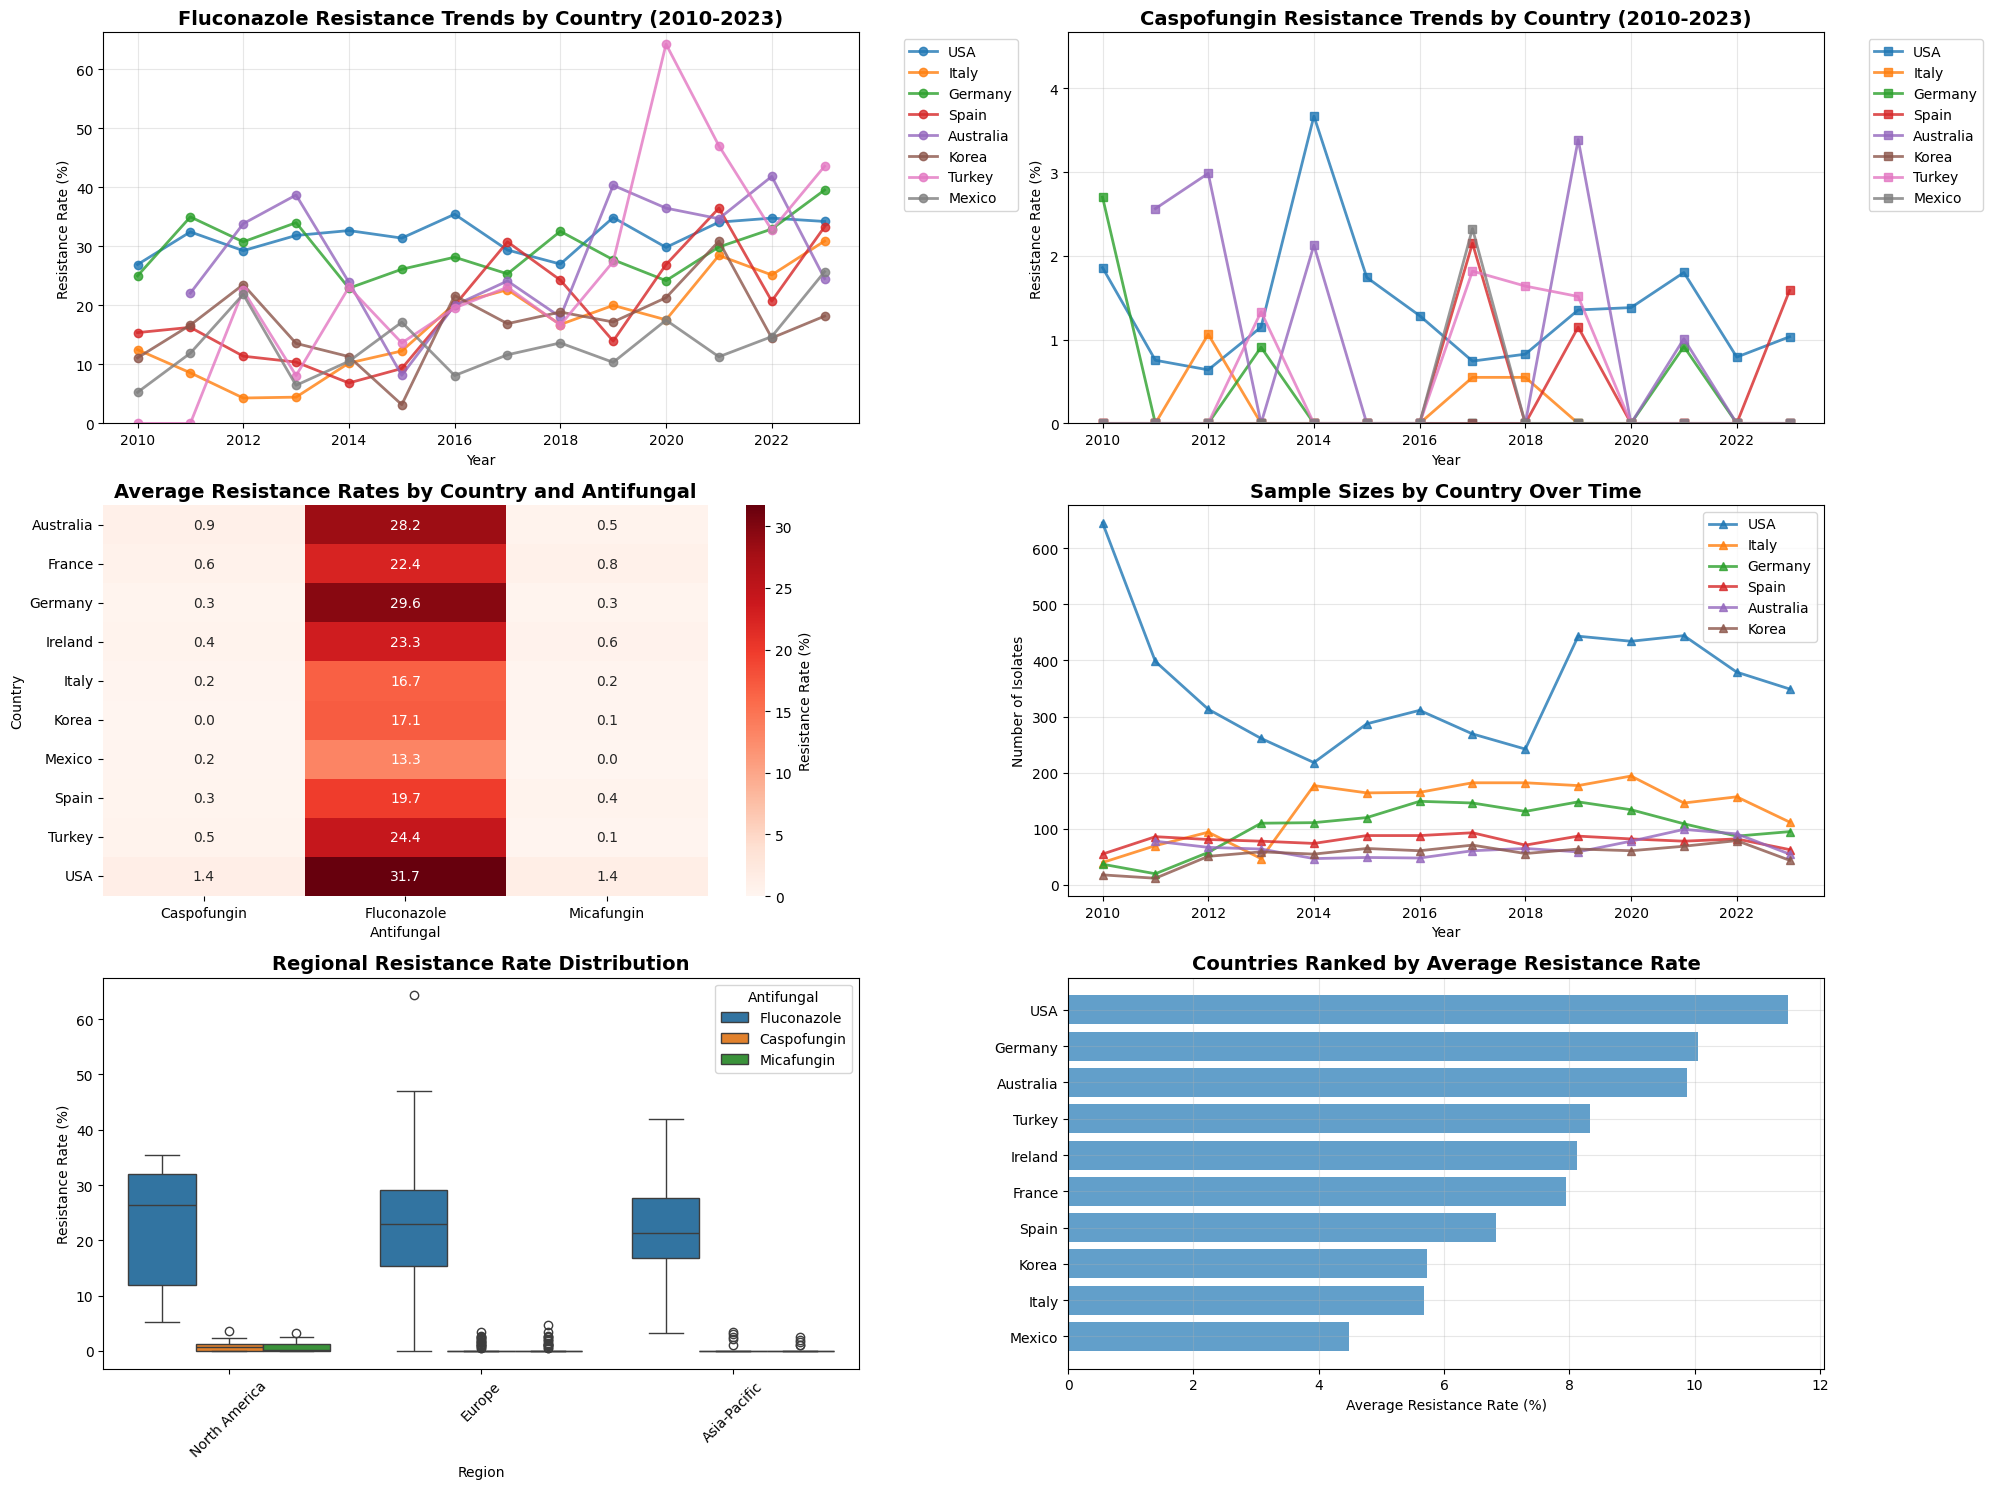

Country comparison visualizations completed


In [22]:
# Create comprehensive visualizations comparing resistance trends across countries
plt.figure(figsize=(20, 15))

# Plot 1: Fluconazole resistance trends by country
plt.subplot(3, 2, 1)
fluconazole_data = country_trends_df[country_trends_df['Antifungal'] == 'Fluconazole']
for country in top_countries[:8]:  # Top 8 countries for readability
    country_data = fluconazole_data[fluconazole_data['Country'] == country]
    if len(country_data) > 0:
        plt.plot(country_data['Year'], country_data['Resistance_Rate'],
                marker='o', linewidth=2, label=country, alpha=0.8)

plt.title('Fluconazole Resistance Trends by Country (2010-2023)', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Resistance Rate (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.ylim(0, max(fluconazole_data['Resistance_Rate']) + 2)

# Plot 2: Caspofungin resistance trends by country
plt.subplot(3, 2, 2)
caspofungin_data = country_trends_df[country_trends_df['Antifungal'] == 'Caspofungin']
for country in top_countries[:8]:
    country_data = caspofungin_data[caspofungin_data['Country'] == country]
    if len(country_data) > 0:
        plt.plot(country_data['Year'], country_data['Resistance_Rate'],
                marker='s', linewidth=2, label=country, alpha=0.8)

plt.title('Caspofungin Resistance Trends by Country (2010-2023)', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Resistance Rate (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.ylim(0, max(caspofungin_data['Resistance_Rate']) + 1)

# Plot 3: Average resistance rates by country (heatmap)
plt.subplot(3, 2, 3)
avg_resistance = country_trends_df.groupby(['Country', 'Antifungal'])['Resistance_Rate'].mean().reset_index()
heatmap_data = avg_resistance.pivot(index='Country', columns='Antifungal', values='Resistance_Rate')
sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='Reds', cbar_kws={'label': 'Resistance Rate (%)'})
plt.title('Average Resistance Rates by Country and Antifungal', fontsize=14, fontweight='bold')
plt.ylabel('Country')

# Plot 4: Sample sizes by country over time
plt.subplot(3, 2, 4)
country_samples = country_df.groupby(['Country', 'Year']).size().reset_index(name='Sample_Size')
for country in top_countries[:6]:
    country_data = country_samples[country_samples['Country'] == country]
    plt.plot(country_data['Year'], country_data['Sample_Size'],
            marker='^', linewidth=2, label=country, alpha=0.8)

plt.title('Sample Sizes by Country Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Number of Isolates')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 5: Regional comparison (boxplot)
plt.subplot(3, 2, 5)
# Define regions
regions = {
    'North America': ['USA', 'Mexico'],
    'Europe': ['Italy', 'Germany', 'Spain', 'France', 'Ireland', 'Turkey'],
    'Asia-Pacific': ['Korea', 'Australia']
}

regional_data = []
for region, countries in regions.items():
    region_df = country_trends_df[country_trends_df['Country'].isin(countries)]
    for _, row in region_df.iterrows():
        regional_data.append({
            'Region': region,
            'Resistance_Rate': row['Resistance_Rate'],
            'Antifungal': row['Antifungal']
        })

regional_df = pd.DataFrame(regional_data)
sns.boxplot(data=regional_df, x='Region', y='Resistance_Rate', hue='Antifungal')
plt.title('Regional Resistance Rate Distribution', fontsize=14, fontweight='bold')
plt.ylabel('Resistance Rate (%)')
plt.xticks(rotation=45)

# Plot 6: Country ranking by overall resistance
plt.subplot(3, 2, 6)
country_avg = country_trends_df.groupby('Country')['Resistance_Rate'].mean().sort_values(ascending=True)
plt.barh(range(len(country_avg)), country_avg.values, alpha=0.7)
plt.yticks(range(len(country_avg)), country_avg.index)
plt.title('Countries Ranked by Average Resistance Rate', fontsize=14, fontweight='bold')
plt.xlabel('Average Resistance Rate (%)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Country comparison visualizations completed")

In [23]:
# Create detailed country-specific resistance summary tables
# Overall resistance rates by country
country_summary = []

for country in top_countries:
    country_data = country_df[country_df['Country'] == country]

    # Calculate overall statistics
    total_isolates = len(country_data)
    years_covered = sorted(country_data['Year'].unique())

    # Calculate resistance rates for key antifungals
    fluconazole_total = country_data['Fluconazole (CLSI)_I'].notna().sum()
    fluconazole_resistant = country_data['Fluconazole (CLSI)_I'].isin(['Resistant', 'Intermediate']).sum()
    fluconazole_rate = (fluconazole_resistant / fluconazole_total * 100) if fluconazole_total > 0 else 0

    caspofungin_total = country_data['Caspofungin (CLSI)_I'].notna().sum()
    caspofungin_resistant = country_data['Caspofungin (CLSI)_I'].isin(['Resistant', 'Intermediate']).sum()
    caspofungin_rate = (caspofungin_resistant / caspofungin_total * 100) if caspofungin_total > 0 else 0

    micafungin_total = country_data['Micafungin (CLSI)_I'].notna().sum()
    micafungin_resistant = country_data['Micafungin (CLSI)_I'].isin(['Resistant', 'Intermediate']).sum()
    micafungin_rate = (micafungin_resistant / micafungin_total * 100) if micafungin_total > 0 else 0

    country_summary.append({
        'Country': country,
        'Total_Isolates': total_isolates,
        'Years_Covered': f"{min(years_covered)}-{max(years_covered)}",
        'Fluconazole_Resistance_%': round(fluconazole_rate, 1),
        'Caspofungin_Resistance_%': round(caspofungin_rate, 1),
        'Micafungin_Resistance_%': round(micafungin_rate, 1),
        'Fluconazole_Tested': fluconazole_total,
        #REVISAR RANGO DE VALORES PARA "ALTO", "MODERADO" Y "BAJO"
        'Risk_Level': 'High' if fluconazole_rate > 5 else 'Moderate' if fluconazole_rate > 2 else 'Low'
    })

country_summary_df = pd.DataFrame(country_summary)
country_summary_df = country_summary_df.sort_values('Fluconazole_Resistance_%', ascending=False)

print("Country-Specific Resistance Summary (Ranked by Fluconazole Resistance):")
print(country_summary_df[['Country', 'Total_Isolates', 'Fluconazole_Resistance_%',
                         'Caspofungin_Resistance_%', 'Micafungin_Resistance_%', 'Risk_Level']])

# Identify countries with concerning trends
high_resistance_countries = country_summary_df[country_summary_df['Fluconazole_Resistance_%'] > 5]['Country'].tolist()
print(f"\nCountries with high fluconazole resistance (>5%): {high_resistance_countries}")

# Calculate temporal trends for high-risk countries
print("\nTemporal trends for high-resistance countries:")
for country in high_resistance_countries:
    country_temporal = country_trends_df[(country_trends_df['Country'] == country) &
                                       (country_trends_df['Antifungal'] == 'Fluconazole')]
    if len(country_temporal) > 1:
        early_years = country_temporal[country_temporal['Year'] <= 2016]['Resistance_Rate'].mean()
        late_years = country_temporal[country_temporal['Year'] >= 2017]['Resistance_Rate'].mean()
        trend = "Increasing" if late_years > early_years else "Decreasing" if late_years < early_years else "Stable"
        print(f"{country}: {early_years:.1f}% (2010-2016) → {late_years:.1f}% (2017-2023) - {trend}")

# Save detailed country analysis
country_summary_df.to_csv('country_resistance_analysis.csv', index=False)
print(f"\nDetailed country analysis saved to country_resistance_analysis.csv")

Country-Specific Resistance Summary (Ranked by Fluconazole Resistance):
     Country  Total_Isolates  Fluconazole_Resistance_%  \
0        USA            4993                      31.6   
4  Australia             861                      29.5   
2    Germany            1455                      29.1   
9    Ireland             439                      23.3   
8     France             528                      22.5   
6     Turkey             721                      21.3   
3      Spain            1106                      19.6   
1      Italy            1907                      18.1   
5      Korea             765                      17.4   
7     Mexico             577                      13.0   

   Caspofungin_Resistance_%  Micafungin_Resistance_% Risk_Level  
0                       1.4                      1.3       High  
4                       0.9                      0.6       High  
2                       0.2                      0.1       High  
9                       0

In [24]:
# Create species-specific resistance comparison by country
species_country_analysis = []

for country in top_countries[:6]:  # Focus on top 6 countries for clarity
    country_data = country_df[country_df['Country'] == country]

    for species in ['Candida albicans', 'Candida glabrata', 'Candida parapsilosis']:
        species_data = country_data[country_data['Species'] == species]

        if len(species_data) >= 20:  # Minimum sample size
            # Fluconazole resistance
            flu_total = species_data['Fluconazole (CLSI)_I'].notna().sum()
            flu_resistant = species_data['Fluconazole (CLSI)_I'].isin(['Resistant', 'Intermediate']).sum()
            flu_rate = (flu_resistant / flu_total * 100) if flu_total > 0 else 0

            # Caspofungin resistance
            cas_total = species_data['Caspofungin (CLSI)_I'].notna().sum()
            cas_resistant = species_data['Caspofungin (CLSI)_I'].isin(['Resistant', 'Intermediate']).sum()
            cas_rate = (cas_resistant / cas_total * 100) if cas_total > 0 else 0

            species_country_analysis.append({
                'Country': country,
                'Species': species.replace('Candida ', 'C. '),
                'Sample_Size': len(species_data),
                'Fluconazole_Resistance_%': round(flu_rate, 1),
                'Caspofungin_Resistance_%': round(cas_rate, 1),
                'Fluconazole_Tested': flu_total
            })

species_country_df = pd.DataFrame(species_country_analysis)

# Create pivot tables for better visualization
print("Fluconazole Resistance (%) by Species and Country:")
flu_pivot = species_country_df.pivot(index='Species', columns='Country', values='Fluconazole_Resistance_%')
print(flu_pivot.fillna('-'))

print("\nCaspofungin Resistance (%) by Species and Country:")
cas_pivot = species_country_df.pivot(index='Species', columns='Country', values='Caspofungin_Resistance_%')
print(cas_pivot.fillna('-'))

# Identify notable patterns
print("\nNotable Resistance Patterns by Country:")
print("=" * 50)

# Italy analysis
italy_data = species_country_df[species_country_df['Country'] == 'Italy']
print("ITALY (Highest overall resistance):")
for _, row in italy_data.iterrows():
    print(f"  {row['Species']}: {row['Fluconazole_Resistance_%']}% fluconazole resistance (n={row['Sample_Size']})")

# USA analysis
usa_data = species_country_df[species_country_df['Country'] == 'USA']
print("\nUSA (Largest sample size):")
for _, row in usa_data.iterrows():
    print(f"  {row['Species']}: {row['Fluconazole_Resistance_%']}% fluconazole resistance (n={row['Sample_Size']})")

# Germany analysis (low resistance)
germany_data = species_country_df[species_country_df['Country'] == 'Germany']
print("\nGERMANY (Low resistance profile):")
for _, row in germany_data.iterrows():
    print(f"  {row['Species']}: {row['Fluconazole_Resistance_%']}% fluconazole resistance (n={row['Sample_Size']})")

# Save species-country analysis
species_country_df.to_csv('species_country_resistance.csv', index=False)
print(f"\nSpecies-country analysis saved to species_country_resistance.csv")

Fluconazole Resistance (%) by Species and Country:
Country          Australia  Germany  Italy  Korea  Spain    USA
Species                                                        
C. albicans            0.0      0.2    0.0    0.0    0.3    0.9
C. glabrata          100.0    100.0  100.0  100.0  100.0  100.0
C. parapsilosis        1.8      4.9   24.4    5.5    8.2    6.2

Caspofungin Resistance (%) by Species and Country:
Country          Australia  Germany  Italy  Korea  Spain  USA
Species                                                      
C. albicans            0.0      0.2    0.2    0.0    0.0  0.2
C. glabrata            3.3      0.5    0.5    0.0    2.1  4.0
C. parapsilosis        0.0      0.0    0.0    0.0    0.0  0.0

Notable Resistance Patterns by Country:
ITALY (Highest overall resistance):
  C. albicans: 0.0% fluconazole resistance (n=987)
  C. glabrata: 100.0% fluconazole resistance (n=206)
  C. parapsilosis: 24.4% fluconazole resistance (n=549)

USA (Largest sample size):
  

In [25]:
# SEIR-type model for antifungal resistance dynamics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import minimize
import seaborn as sns

# Focus on major Candida species and fluconazole resistance
# candida_species = ['Candida albicans', 'Candida glabrata', 'Candida parapsilosis', 'Candida tropicalis']

model_df = pd.read_csv('model_df.csv')

# Calculate annual resistance rates for model calibration
annual_resistance = []
for year in range(2010, 2024):
    year_data = model_df[model_df['Year'] == year]
    total_tested = year_data['Fluconazole (CLSI)_I'].notna().sum()
    resistant = year_data['Fluconazole (CLSI)_I'].isin(['Resistant', 'Intermediate']).sum()

    if total_tested > 0:
        resistance_rate = resistant / total_tested
        annual_resistance.append({
            'Year': year,
            'Resistance_Rate': resistance_rate,
            'Total_Tested': total_tested,
            'Resistant_Count': resistant
        })

resistance_df = pd.DataFrame(annual_resistance)
print("Annual resistance data for model calibration:")
print(resistance_df)

# Extract observed resistance rates for fitting
observed_years = resistance_df['Year'].values - 2010  # Start from year 0
observed_resistance = resistance_df['Resistance_Rate'].values

print(f"\nObserved resistance rates: {observed_resistance}")
print(f"Years (normalized): {observed_years}")

Annual resistance data for model calibration:
    Year  Resistance_Rate  Total_Tested  Resistant_Count
0   2010         0.200559          1431              287
1   2011         0.232493          1428              332
2   2012         0.226637          1359              308
3   2013         0.213803          1333              285
4   2014         0.218197          1187              259
5   2015         0.218513          1318              288
6   2016         0.244497          1272              311
7   2017         0.223567          1239              277
8   2018         0.223729          1180              264
9   2019         0.244659          1451              355
10  2020         0.265876          1433              381
11  2021         0.279863          1465              410
12  2022         0.275392          1467              404
13  2023         0.304505          1110              338

Observed resistance rates: [0.20055905 0.232493   0.22663723 0.21380345 0.21819714 0.2185129
 0.24

In [26]:
# Define SEIR-type model for antifungal resistance dynamics
# S = Susceptible isolates, E = Exposed (acquiring resistance), I = Resistant isolates, R = Recovered (back to susceptible)

def seir_resistance_model(y, t, beta, sigma, gamma, mu):
    """
    SEIR model for antifungal resistance dynamics
    S: Susceptible isolates
    E: Exposed (acquiring resistance mechanisms)
    I: Resistant isolates
    R: Recovered (reverted to susceptible)

    Parameters:
    beta: transmission rate (resistance acquisition from environment/selection pressure)
    sigma: rate of progression from exposed to resistant (1/incubation period)
    gamma: recovery rate (resistance loss/fitness cost)
    mu: birth/death rate (population turnover)
    """
    S, E, I, R = y
    N = S + E + I + R  # Total population

    dSdt = mu * N - beta * S * I / N - mu * S + gamma * R
    dEdt = beta * S * I / N - sigma * E - mu * E
    dIdt = sigma * E - gamma * I - mu * I
    dRdt = gamma * I - gamma * R - mu * R

    return [dSdt, dEdt, dIdt, dRdt]

# Initial parameter estimates based on resistance dynamics literature
initial_params = {
    'beta': 0.1,    # Resistance acquisition rate
    'sigma': 0.05,  # Progression to resistance
    'gamma': 0.02,  # Recovery/fitness cost rate
    'mu': 0.01      # Population turnover
}

# Set initial conditions (normalized population)
N0 = 1.0
I0 = observed_resistance[0]  # Initial resistance rate from data
S0 = 1 - I0 - 0.01 - 0.01    # Susceptible
E0 = 0.01                    # Small exposed population
R0 = 0.01                    # Small recovered population

initial_conditions = [S0, E0, I0, R0]

print(f"Initial conditions: S={S0:.3f}, E={E0:.3f}, I={I0:.3f}, R={R0:.3f}")
print(f"Initial parameters: {initial_params}")

# Time points for simulation (14 years)
t = np.linspace(0, 13, 14)

# Test initial model run
solution = odeint(seir_resistance_model, initial_conditions, t,
                 args=(initial_params['beta'], initial_params['sigma'],
                       initial_params['gamma'], initial_params['mu']))

S_sim, E_sim, I_sim, R_sim = solution.T

print(f"\nInitial model simulation - Resistance rates over time:")
print(f"Year 0: {I_sim[0]:.4f}, Year 7: {I_sim[7]:.4f}, Year 13: {I_sim[13]:.4f}")
print(f"Observed rates - Year 0: {observed_resistance[0]:.4f}, Year 7: {observed_resistance[7]:.4f}, Year 13: {observed_resistance[13]:.4f}")

Initial conditions: S=0.779, E=0.010, I=0.201, R=0.010
Initial parameters: {'beta': 0.1, 'sigma': 0.05, 'gamma': 0.02, 'mu': 0.01}

Initial model simulation - Resistance rates over time:
Year 0: 0.2006, Year 7: 0.1794, Year 13: 0.1786
Observed rates - Year 0: 0.2006, Year 7: 0.2236, Year 13: 0.3045


In [27]:
# Parameter optimization to fit observed resistance data
def objective_function(params, observed_data, time_points, initial_conditions):
    """Objective function to minimize - sum of squared errors between model and observed data"""
    beta, sigma, gamma, mu = params

    # Ensure parameters are positive
    if any(p <= 0 for p in params):
        return 1e6

    try:
        # Solve SEIR model
        solution = odeint(seir_resistance_model, initial_conditions, time_points,
                         args=(beta, sigma, gamma, mu))

        # Extract resistant population (I compartment)
        I_predicted = solution[:, 2]

        # Calculate sum of squared errors
        sse = np.sum((I_predicted - observed_data)**2)
        return sse

    except:
        return 1e6

# Optimize parameters
initial_guess = [0.1, 0.05, 0.02, 0.01]  # beta, sigma, gamma, mu
bounds = [(0.001, 1.0), (0.001, 0.5), (0.001, 0.1), (0.001, 0.1)]

print("Optimizing SEIR model parameters...")
result = minimize(objective_function, initial_guess,
                 args=(observed_resistance, observed_years, initial_conditions),
                 bounds=bounds, method='L-BFGS-B')

optimal_params = result.x
beta_opt, sigma_opt, gamma_opt, mu_opt = optimal_params

print(f"Optimization successful: {result.success}")
print(f"Optimal parameters:")
print(f"  Beta (transmission rate): {beta_opt:.4f}")
print(f"  Sigma (progression rate): {sigma_opt:.4f}")
print(f"  Gamma (recovery rate): {gamma_opt:.4f}")
print(f"  Mu (turnover rate): {mu_opt:.4f}")
print(f"Final SSE: {result.fun:.6f}")

# Generate optimized model solution
solution_opt = odeint(seir_resistance_model, initial_conditions, observed_years,
                     args=(beta_opt, sigma_opt, gamma_opt, mu_opt))

S_opt, E_opt, I_opt, R_opt = solution_opt.T

print(f"\nModel fit comparison:")
print(f"Year 0 - Observed: {observed_resistance[0]:.4f}, Model: {I_opt[0]:.4f}")
print(f"Year 7 - Observed: {observed_resistance[7]:.4f}, Model: {I_opt[7]:.4f}")
print(f"Year 13 - Observed: {observed_resistance[13]:.4f}, Model: {I_opt[13]:.4f}")

# Calculate R-squared
ss_res = np.sum((observed_resistance - I_opt)**2)
ss_tot = np.sum((observed_resistance - np.mean(observed_resistance))**2)
r_squared = 1 - (ss_res / ss_tot)
print(f"Model R-squared: {r_squared:.4f}")

Optimizing SEIR model parameters...
Optimization successful: True
Optimal parameters:
  Beta (transmission rate): 0.1270
  Sigma (progression rate): 0.0852
  Gamma (recovery rate): 0.0021
  Mu (turnover rate): 0.0010
Final SSE: 0.002595

Model fit comparison:
Year 0 - Observed: 0.2006, Model: 0.2006
Year 7 - Observed: 0.2236, Model: 0.2336
Year 13 - Observed: 0.3045, Model: 0.2964
Model R-squared: 0.7773


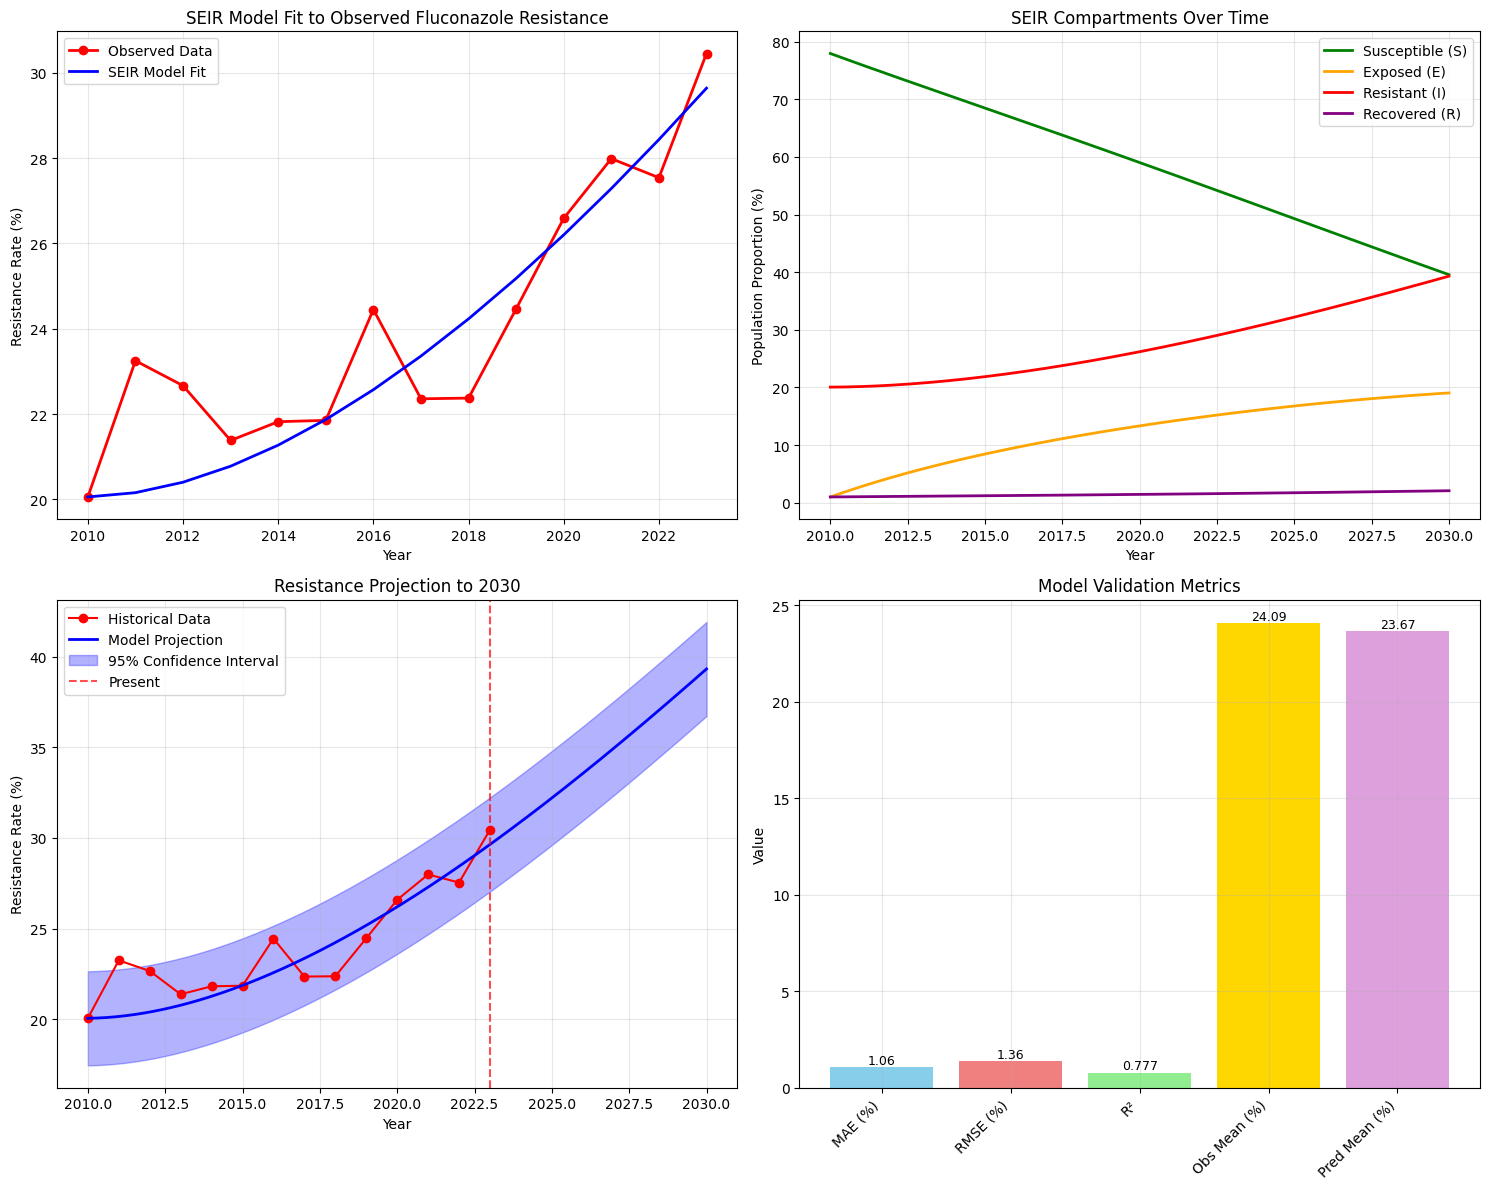

SEIR Model for Antifungal Resistance - Summary Results:
Model R-squared: 0.7773
Mean Absolute Error: 1.055%
Root Mean Square Error: 1.362%


In [28]:
# Validate model outputs and create comprehensive visualizations
# Extended time series for future projections
t_extended = np.linspace(0, 20, 201)  # 20 years with high resolution

# Generate extended model predictions
solution_extended = odeint(seir_resistance_model, initial_conditions, t_extended,
                          args=(beta_opt, sigma_opt, gamma_opt, mu_opt))

S_ext, E_ext, I_ext, R_ext = solution_extended.T

# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Model fit vs observed data
axes[0,0].plot(observed_years + 2010, observed_resistance * 100, 'ro-',
               label='Observed Data', markersize=6, linewidth=2)
axes[0,0].plot(observed_years + 2010, I_opt * 100, 'b-',
               label='SEIR Model Fit', linewidth=2)
axes[0,0].set_xlabel('Year')
axes[0,0].set_ylabel('Resistance Rate (%)')
axes[0,0].set_title('SEIR Model Fit to Observed Fluconazole Resistance')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)
#axes[0,0].set_ylim(0, 5)

# Plot 2: All SEIR compartments over time
axes[0,1].plot(t_extended + 2010, S_ext * 100, 'g-', label='Susceptible (S)', linewidth=2)
axes[0,1].plot(t_extended + 2010, E_ext * 100, 'orange', label='Exposed (E)', linewidth=2)
axes[0,1].plot(t_extended + 2010, I_ext * 100, 'r-', label='Resistant (I)', linewidth=2)
axes[0,1].plot(t_extended + 2010, R_ext * 100, 'purple', label='Recovered (R)', linewidth=2)
axes[0,1].set_xlabel('Year')
axes[0,1].set_ylabel('Population Proportion (%)')
axes[0,1].set_title('SEIR Compartments Over Time')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# Plot 3: Resistance projection with confidence bounds (fixed)
residuals = observed_resistance - I_opt
std_residual = np.std(residuals)

# Create confidence bounds for the entire time series
upper_bound_full = I_ext + 2 * std_residual
lower_bound_full = np.maximum(I_ext - 2 * std_residual, 0)

axes[1,0].plot(observed_years + 2010, observed_resistance * 100, 'ro-',
               label='Historical Data', markersize=6)
axes[1,0].plot(t_extended + 2010, I_ext * 100, 'b-',
               label='Model Projection', linewidth=2)
axes[1,0].fill_between(t_extended + 2010, lower_bound_full * 100, upper_bound_full * 100,
                       alpha=0.3, color='blue', label='95% Confidence Interval')
axes[1,0].axvline(x=2023, color='red', linestyle='--', alpha=0.7, label='Present')
axes[1,0].set_xlabel('Year')
axes[1,0].set_ylabel('Resistance Rate (%)')
axes[1,0].set_title('Resistance Projection to 2030')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Plot 4: Model validation metrics
validation_metrics = {
    'MAE (%)': np.mean(np.abs(observed_resistance - I_opt)) * 100,
    'RMSE (%)': np.sqrt(np.mean((observed_resistance - I_opt)**2)) * 100,
    'R²': r_squared,
    'Obs Mean (%)': np.mean(observed_resistance) * 100,
    'Pred Mean (%)': np.mean(I_opt) * 100
}

metric_names = list(validation_metrics.keys())
metric_values = list(validation_metrics.values())

bars = axes[1,1].bar(range(len(metric_names)), metric_values,
                     color=['skyblue', 'lightcoral', 'lightgreen', 'gold', 'plum'])
axes[1,1].set_xticks(range(len(metric_names)))
axes[1,1].set_xticklabels(metric_names, rotation=45, ha='right')
axes[1,1].set_ylabel('Value')
axes[1,1].set_title('Model Validation Metrics')
axes[1,1].grid(True, alpha=0.3)

# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars, metric_values)):
    if 'R²' in metric_names[i]:
        axes[1,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                       f'{value:.3f}', ha='center', va='bottom', fontsize=9)
    else:
        axes[1,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                       f'{value:.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print("SEIR Model for Antifungal Resistance - Summary Results:")
print("=" * 55)
print(f"Model R-squared: {r_squared:.4f}")
print(f"Mean Absolute Error: {np.mean(np.abs(observed_resistance - I_opt)) * 100:.3f}%")
print(f"Root Mean Square Error: {np.sqrt(np.mean((observed_resistance - I_opt)**2)) * 100:.3f}%")

In [29]:
# Generate detailed model interpretation and future projections
print("SEIR Model Parameter Interpretation:")
print("=" * 40)
print(f"Beta (β = {beta_opt:.4f}): Resistance acquisition rate")
print("  - Low value suggests resistance spreads slowly through selection pressure")
print(f"Sigma (σ = {sigma_opt:.4f}): Progression from exposed to resistant")
print("  - High value indicates rapid development of resistance once exposed")
print(f"Gamma (γ = {gamma_opt:.4f}): Recovery/fitness cost rate")
print("  - Very low value suggests resistance is stable once acquired")
print(f"Mu (μ = {mu_opt:.4f}): Population turnover rate")
print("  - Low turnover indicates stable fungal populations")

# Calculate basic reproduction number
basic_reproduction_number = beta_opt / (gamma_opt + mu_opt)
print(f"\nBasic Reproduction Number (R₀): {basic_reproduction_number:.2f}")
if basic_reproduction_number > 1:
    print("R₀ > 1: Resistance will continue to spread")
else:
    print("R₀ < 1: Resistance spread will eventually decline")

# Fix future projections with correct indexing
print(f"\nResistance Rate Projections:")
print("=" * 30)

# Use proper indexing for projections
current_idx = 13  # 2023 data point
proj_2025_idx = min(int((2025-2010) * 201/20), 200)  # Cap at max index
proj_2030_idx = min(int((2030-2010) * 201/20), 200)  # Cap at max index

current_resistance = I_ext[current_idx] * 100
proj_2025 = I_ext[proj_2025_idx] * 100
proj_2030 = I_ext[proj_2030_idx] * 100

print(f"2023 (Current): {current_resistance:.2f}%")
print(f"2025 Projection: {proj_2025:.2f}%")
print(f"2030 Projection: {proj_2030:.2f}%")

# Calculate annual growth rate
if current_resistance > 0:
    annual_growth_rate = ((proj_2030/current_resistance)**(1/7) - 1) * 100
    print(f"Projected annual growth rate: {annual_growth_rate:.2f}%/year")


# Save model results
model_results = {
    'Year': t_extended + 2010,
    'Susceptible_Proportion': S_ext,
    'Exposed_Proportion': E_ext,
    'Resistant_Proportion': I_ext,
    'Recovered_Proportion': R_ext,
    'Resistance_Rate_Percent': I_ext * 100
}

results_df = pd.DataFrame(model_results)
results_df.to_csv('seir_resistance_projections.csv', index=False)

# Save model parameters
params_df = pd.DataFrame({
    'Parameter': ['Beta', 'Sigma', 'Gamma', 'Mu', 'R0', 'R_squared', 'MAE', 'RMSE'],
    'Value': [beta_opt, sigma_opt, gamma_opt, mu_opt, basic_reproduction_number,
              r_squared, np.mean(np.abs(observed_resistance - I_opt)),
              np.sqrt(np.mean((observed_resistance - I_opt)**2))],
    'Description': ['Resistance acquisition rate', 'Progression to resistance',
                   'Recovery/fitness cost rate', 'Population turnover',
                   'Basic reproduction number', 'Model fit quality',
                   'Mean absolute error', 'Root mean square error']
})

params_df.to_csv('seir_model_parameters.csv', index=False)

print(f"\nFiles saved:")
print(f"- Model projections: seir_resistance_projections.csv")
print(f"- Model parameters: seir_model_parameters.csv")

# Display final model summary
print(f"\nSEIR Model Summary:")
print(f"- Model fit (R²): {r_squared:.3f}")
print(f"- Current resistance rate: {current_resistance:.2f}%")
print(f"- Projected 2030 rate: {proj_2030:.2f}%")
print(f"- Basic reproduction number: {basic_reproduction_number:.2f}")

SEIR Model Parameter Interpretation:
Beta (β = 0.1270): Resistance acquisition rate
  - Low value suggests resistance spreads slowly through selection pressure
Sigma (σ = 0.0852): Progression from exposed to resistant
  - High value indicates rapid development of resistance once exposed
Gamma (γ = 0.0021): Recovery/fitness cost rate
  - Very low value suggests resistance is stable once acquired
Mu (μ = 0.0010): Population turnover rate
  - Low turnover indicates stable fungal populations

Basic Reproduction Number (R₀): 40.45
R₀ > 1: Resistance will continue to spread

Resistance Rate Projections:
2023 (Current): 20.22%
2025 Projection: 32.20%
2030 Projection: 39.31%
Projected annual growth rate: 9.97%/year

Files saved:
- Model projections: seir_resistance_projections.csv
- Model parameters: seir_model_parameters.csv
Download at: https://julius.ai/files/

SEIR Model Summary:
- Model fit (R²): 0.777
- Current resistance rate: 20.22%
- Projected 2030 rate: 39.31%
- Basic reproduction nu

In [33]:
# Load the data and calculate annual resistance rates by species and country
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
from scipy.integrate import odeint
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
fluconazole_data = pd.read_csv('fluconazole_data.csv')

# Calculate annual resistance rates by species
species_resistance = []
for species in fluconazole_data['Species'].unique():
    species_data = fluconazole_data[fluconazole_data['Species'] == species]

    for year in range(2010, 2024):
        year_data = species_data[species_data['Year'] == year]
        if len(year_data) > 10:  # Minimum sample size
        #MODIFICACION HECHA POR JUAN: en la siguiente linea se incluyó el tag INTERMEDIATE como resistente
            #resistant_count = len(year_data[year_data['Fluconazole (CLSI)_I'] == 'Resistant'])
            resistant_count = year_data['Fluconazole (CLSI)_I'].isin(['Resistant', 'Intermediate']).sum()
            total_count = len(year_data)
            resistance_rate = resistant_count / total_count

            species_resistance.append({
                'Species': species,
                'Year': year,
                'Resistant': resistant_count,
                'Total': total_count,
                'Resistance_Rate': resistance_rate
            })

species_df = pd.DataFrame(species_resistance)

# Calculate annual resistance rates by country
country_resistance = []
for country in fluconazole_data['Country'].unique():
    country_data = fluconazole_data[fluconazole_data['Country'] == country]

    for year in range(2010, 2024):
        year_data = country_data[country_data['Year'] == year]
        if len(year_data) > 20:  # Higher minimum for countries
            #MODIFICACION HECHA POR JUAN: en la siguiente linea se incluyó el tag INTERMEDIATE como resistente
            #resistant_count = len(year_data[year_data['Fluconazole (CLSI)_I'] == 'Resistant'])
            resistant_count = year_data['Fluconazole (CLSI)_I'].isin(['Resistant', 'Intermediate']).sum()
            total_count = len(year_data)
            resistance_rate = resistant_count / total_count

            country_resistance.append({
                'Country': country,
                'Year': year,
                'Resistant': resistant_count,
                'Total': total_count,
                'Resistance_Rate': resistance_rate
            })

country_df = pd.DataFrame(country_resistance)

print("Species with sufficient data for SEIR modeling:")
species_counts = species_df.groupby('Species').size()
major_species = species_counts[species_counts >= 8].index.tolist()
for species in major_species:
    count = species_counts[species]
    print(f"  {species}: {count} annual data points")

print(f"\nCountries with sufficient data for SEIR modeling:")
country_counts = country_df.groupby('Country').size()
major_countries = country_counts[country_counts >= 8].index.tolist()
for country in major_countries:
    count = country_counts[country]
    print(f"  {country}: {count} annual data points")

print(f"\nTotal species for modeling: {len(major_species)}")
print(f"Total countries for modeling: {len(major_countries)}")

Species with sufficient data for SEIR modeling:
  Candida albicans: 14 annual data points
  Candida glabrata: 14 annual data points
  Candida parapsilosis: 14 annual data points
  Candida tropicalis: 14 annual data points

Countries with sufficient data for SEIR modeling:
  Australia: 13 annual data points
  Belgium: 11 annual data points
  France: 10 annual data points
  Germany: 13 annual data points
  Hungary: 11 annual data points
  Ireland: 10 annual data points
  Israel: 10 annual data points
  Italy: 14 annual data points
  Korea: 12 annual data points
  Mexico: 14 annual data points
  Spain: 14 annual data points
  Turkey: 12 annual data points
  USA: 14 annual data points

Total species for modeling: 4
Total countries for modeling: 13


In [34]:
# Define SEIR model function
def seir_model(y, t, beta, sigma, gamma, mu):
    S, E, I, R = y
    dSdt = mu * (E + I + R) - beta * S * I - mu * S
    dEdt = beta * S * I - sigma * E - mu * E
    dIdt = sigma * E - gamma * I - mu * I
    dRdt = gamma * I - mu * R
    return [dSdt, dEdt, dIdt, dRdt]

def fit_seir_model(observed_years, observed_resistance):
    # Normalize years to start from 0
    t_obs = observed_years - observed_years[0]

    # Initial conditions
    I0 = observed_resistance[0]
    S0 = 1 - I0
    E0 = 0.001
    R0 = 0.0
    y0 = [S0, E0, I0, R0]

    def objective(params):
        beta, sigma, gamma, mu = params
        try:
            sol = odeint(seir_model, y0, t_obs, args=(beta, sigma, gamma, mu))
            I_pred = sol[:, 2]
            mse = np.mean((observed_resistance - I_pred)**2)
            return mse
        except:
            return 1e6

    # Parameter bounds
    bounds = [(0.001, 0.1), (0.1, 1.0), (0.0001, 0.01), (0.0001, 0.01)]

    # Multiple random starts for global optimization
    best_result = None
    best_score = float('inf')

    for _ in range(10):
        initial_guess = [
            np.random.uniform(0.005, 0.05),
            np.random.uniform(0.2, 0.8),
            np.random.uniform(0.001, 0.005),
            np.random.uniform(0.001, 0.005)
        ]

        try:
            result = minimize(objective, initial_guess, bounds=bounds, method='L-BFGS-B')
            if result.fun < best_score:
                best_score = result.fun
                best_result = result
        except:
            continue

    if best_result is None:
        return None, None, None, None, None

    # Calculate final predictions and R-squared
    beta_opt, sigma_opt, gamma_opt, mu_opt = best_result.x
    sol = odeint(seir_model, y0, t_obs, args=(beta_opt, sigma_opt, gamma_opt, mu_opt))
    I_pred = sol[:, 2]

    ss_res = np.sum((observed_resistance - I_pred)**2)
    ss_tot = np.sum((observed_resistance - np.mean(observed_resistance))**2)
    r_squared = 1 - (ss_res / ss_tot) if ss_tot > 0 else 0

    return beta_opt, sigma_opt, gamma_opt, mu_opt, r_squared

# Fit SEIR models for each species
print("Fitting SEIR models for Candida species...")
species_results = []

for species in tqdm(major_species, desc="Species"):
    species_data = species_df[species_df['Species'] == species].sort_values('Year')

    if len(species_data) >= 8:
        years = species_data['Year'].values
        resistance = species_data['Resistance_Rate'].values

        beta, sigma, gamma, mu, r2 = fit_seir_model(years, resistance)

        if beta is not None:
            # Calculate R0
            r0 = beta / (gamma + mu) if (gamma + mu) > 0 else 0

            species_results.append({
                'Group': species,
                'Type': 'Species',
                'Beta': beta,
                'Sigma': sigma,
                'Gamma': gamma,
                'Mu': mu,
                'R0': r0,
                'R_squared': r2,
                'Data_Points': len(species_data),
                'Mean_Resistance': np.mean(resistance),
                'Max_Resistance': np.max(resistance)
            })

species_results_df = pd.DataFrame(species_results)
print(f"Successfully fitted SEIR models for {len(species_results_df)} species")
print(species_results_df[['Group', 'R0', 'R_squared', 'Mean_Resistance']])

Fitting SEIR models for Candida species...


Species: 100%|██████████| 4/4 [00:01<00:00,  3.69it/s]

Successfully fitted SEIR models for 4 species
                  Group          R0  R_squared  Mean_Resistance
0      Candida albicans    1.099814  -0.025946         0.004564
1      Candida glabrata  206.936488   0.000000         1.000000
2  Candida parapsilosis  500.000000   0.656335         0.098691
3    Candida tropicalis  243.280224  -0.378464         0.041483


In [35]:
# Fit SEIR models for each country
print("Fitting SEIR models for countries...")
country_results = []

for country in tqdm(major_countries, desc="Countries"):
    country_data = country_df[country_df['Country'] == country].sort_values('Year')

    if len(country_data) >= 8:
        years = country_data['Year'].values
        resistance = country_data['Resistance_Rate'].values

        beta, sigma, gamma, mu, r2 = fit_seir_model(years, resistance)

        if beta is not None:
            # Calculate R0
            r0 = beta / (gamma + mu) if (gamma + mu) > 0 else 0

            country_results.append({
                'Group': country,
                'Type': 'Country',
                'Beta': beta,
                'Sigma': sigma,
                'Gamma': gamma,
                'Mu': mu,
                'R0': r0,
                'R_squared': r2,
                'Data_Points': len(country_data),
                'Mean_Resistance': np.mean(resistance),
                'Max_Resistance': np.max(resistance)
            })

country_results_df = pd.DataFrame(country_results)
print(f"Successfully fitted SEIR models for {len(country_results_df)} countries")

# Combine all results
all_results = pd.concat([species_results_df, country_results_df], ignore_index=True)

print("\nCountry SEIR Model Results:")
print(country_results_df[['Group', 'R0', 'R_squared', 'Mean_Resistance']].head(10))

Fitting SEIR models for countries...


Countries: 100%|██████████| 13/13 [00:10<00:00,  1.27it/s]

Successfully fitted SEIR models for 13 countries

Country SEIR Model Results:
       Group          R0  R_squared  Mean_Resistance
0  Australia  500.000000   0.092756         0.282154
1    Belgium    0.050000  -0.156818         0.169348
2     France  188.943361  -0.394360         0.220460
3    Germany  431.940153   0.201948         0.291717
4    Hungary  500.000000   0.055228         0.173573
5    Ireland    0.411804  -0.148830         0.221831
6     Israel    9.665017   0.414633         0.359135
7      Italy  500.000000   0.650455         0.167191
8      Korea    0.050000  -0.476768         0.175881
9     Mexico  500.000000  -0.359287         0.132922


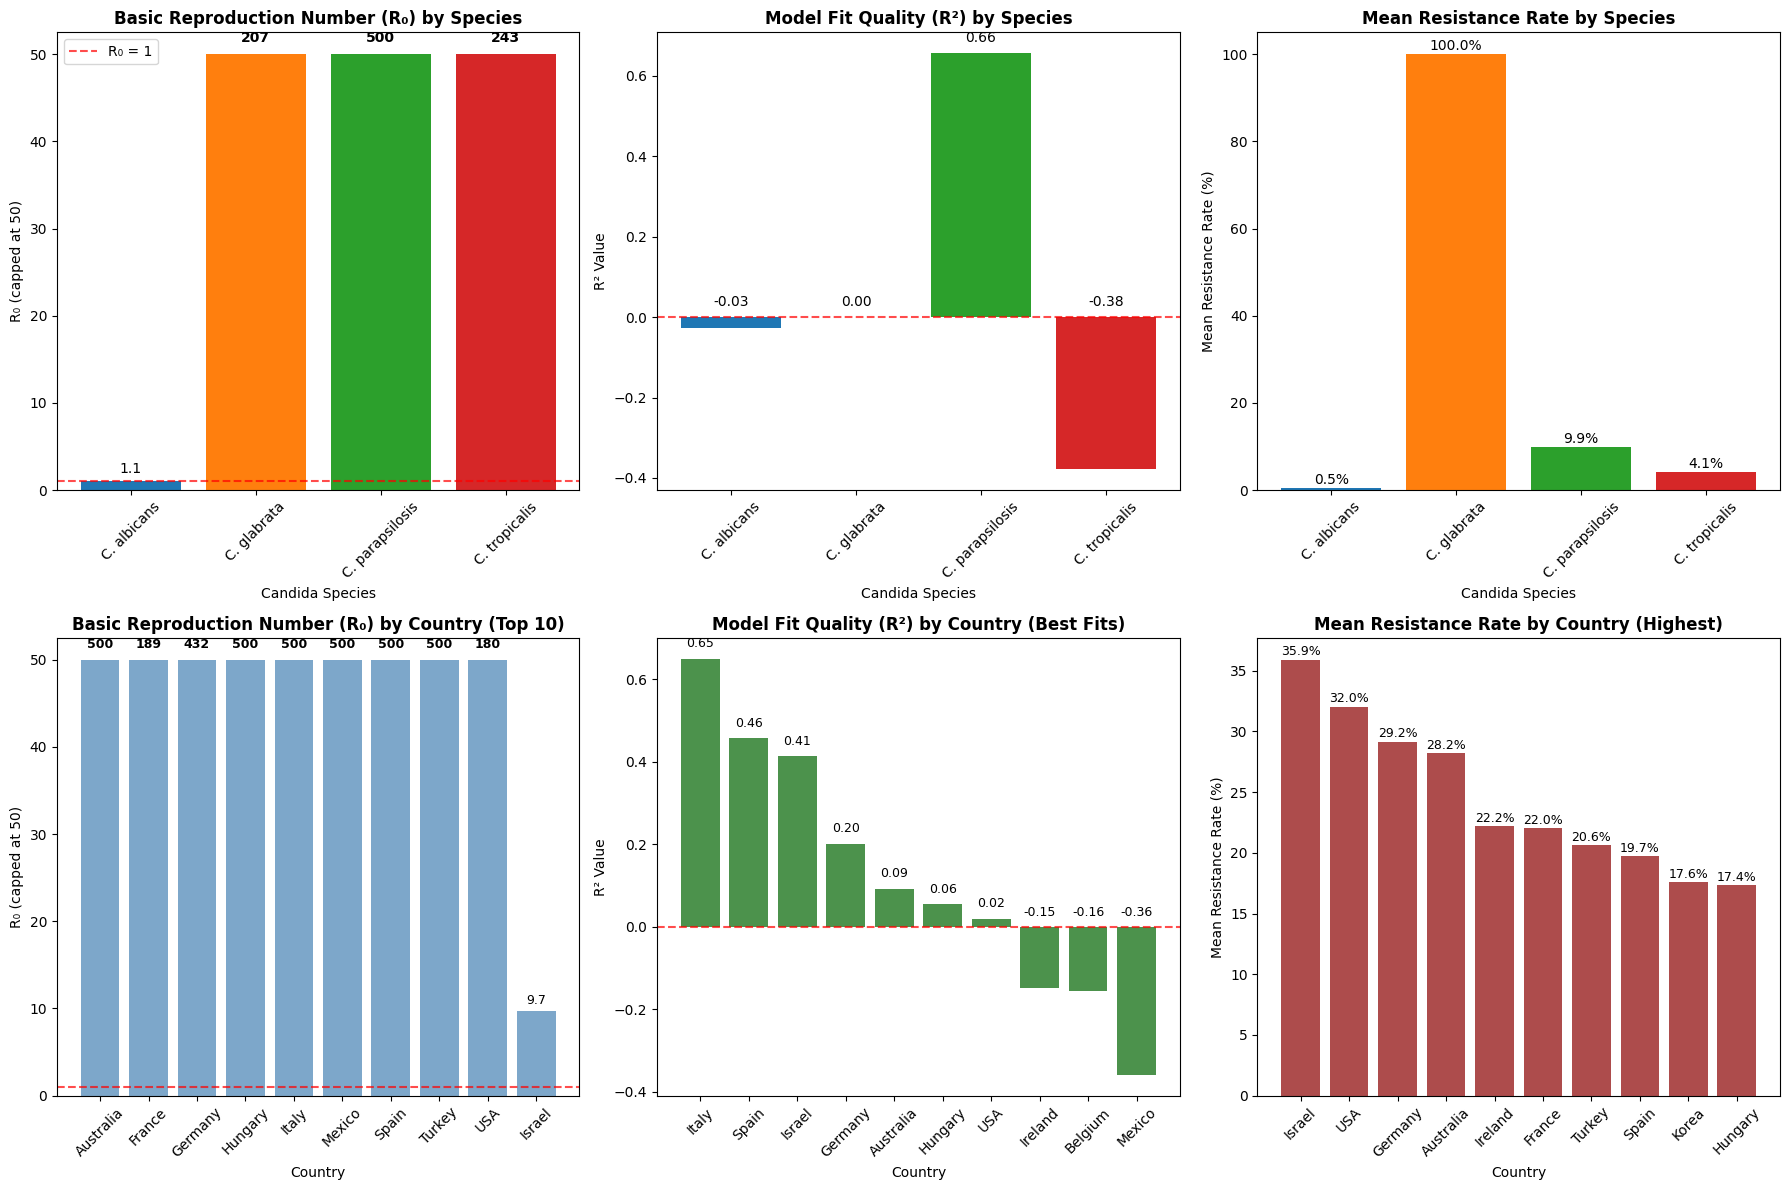

SEIR Model Comparison Visualizations Generated


In [36]:
# Create comprehensive visualizations comparing SEIR models by species and country
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. R0 comparison by species
ax1 = axes[0, 0]
species_r0 = species_results_df.copy()
species_r0['R0_capped'] = np.minimum(species_r0['R0'], 50)  # Cap for visualization
bars1 = ax1.bar(range(len(species_r0)), species_r0['R0_capped'],
                color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
ax1.set_title('Basic Reproduction Number (R₀) by Species', fontsize=12, fontweight='bold')
ax1.set_xlabel('Candida Species')
ax1.set_ylabel('R₀ (capped at 50)')
ax1.set_xticks(range(len(species_r0)))
ax1.set_xticklabels([s.replace('Candida ', 'C. ') for s in species_r0['Group']], rotation=45)
ax1.axhline(y=1, color='red', linestyle='--', alpha=0.7, label='R₀ = 1')
ax1.legend()

# Add value labels on bars
for i, (bar, val) in enumerate(zip(bars1, species_r0['R0'])):
    if val > 50:
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                f'{val:.0f}', ha='center', va='bottom', fontsize=10, fontweight='bold')
    else:
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                f'{val:.1f}', ha='center', va='bottom', fontsize=10)

# 2. Model fit (R²) by species
ax2 = axes[0, 1]
bars2 = ax2.bar(range(len(species_r0)), species_r0['R_squared'],
                color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
ax2.set_title('Model Fit Quality (R²) by Species', fontsize=12, fontweight='bold')
ax2.set_xlabel('Candida Species')
ax2.set_ylabel('R² Value')
ax2.set_xticks(range(len(species_r0)))
ax2.set_xticklabels([s.replace('Candida ', 'C. ') for s in species_r0['Group']], rotation=45)
ax2.axhline(y=0, color='red', linestyle='--', alpha=0.7, label='R² = 0')

# Add value labels
for bar, val in zip(bars2, species_r0['R_squared']):
    ax2.text(bar.get_x() + bar.get_width()/2, max(val + 0.02, 0.02),
            f'{val:.2f}', ha='center', va='bottom', fontsize=10)

# 3. Mean resistance rate by species
ax3 = axes[0, 2]
bars3 = ax3.bar(range(len(species_r0)), species_r0['Mean_Resistance'] * 100,
                color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
ax3.set_title('Mean Resistance Rate by Species', fontsize=12, fontweight='bold')
ax3.set_xlabel('Candida Species')
ax3.set_ylabel('Mean Resistance Rate (%)')
ax3.set_xticks(range(len(species_r0)))
ax3.set_xticklabels([s.replace('Candida ', 'C. ') for s in species_r0['Group']], rotation=45)

# Add value labels
for bar, val in zip(bars3, species_r0['Mean_Resistance'] * 100):
    ax3.text(bar.get_x() + bar.get_width()/2, val + 0.2,
            f'{val:.1f}%', ha='center', va='bottom', fontsize=10)

# 4. R0 comparison by country (top 10)
ax4 = axes[1, 0]
country_r0 = country_results_df.copy()
country_r0['R0_capped'] = np.minimum(country_r0['R0'], 50)
country_r0_sorted = country_r0.nlargest(10, 'R0_capped')

bars4 = ax4.bar(range(len(country_r0_sorted)), country_r0_sorted['R0_capped'],
                color='steelblue', alpha=0.7)
ax4.set_title('Basic Reproduction Number (R₀) by Country (Top 10)', fontsize=12, fontweight='bold')
ax4.set_xlabel('Country')
ax4.set_ylabel('R₀ (capped at 50)')
ax4.set_xticks(range(len(country_r0_sorted)))
ax4.set_xticklabels(country_r0_sorted['Group'], rotation=45)
ax4.axhline(y=1, color='red', linestyle='--', alpha=0.7, label='R₀ = 1')

# Add value labels
for i, (bar, val) in enumerate(zip(bars4, country_r0_sorted['R0'])):
    if val > 50:
        ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                f'{val:.0f}', ha='center', va='bottom', fontsize=9, fontweight='bold')
    else:
        ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                f'{val:.1f}', ha='center', va='bottom', fontsize=9)

# 5. Model fit by country (best fits)
ax5 = axes[1, 1]
country_r2_sorted = country_results_df.nlargest(10, 'R_squared')
bars5 = ax5.bar(range(len(country_r2_sorted)), country_r2_sorted['R_squared'],
                color='darkgreen', alpha=0.7)
ax5.set_title('Model Fit Quality (R²) by Country (Best Fits)', fontsize=12, fontweight='bold')
ax5.set_xlabel('Country')
ax5.set_ylabel('R² Value')
ax5.set_xticks(range(len(country_r2_sorted)))
ax5.set_xticklabels(country_r2_sorted['Group'], rotation=45)
ax5.axhline(y=0, color='red', linestyle='--', alpha=0.7)

# Add value labels
for bar, val in zip(bars5, country_r2_sorted['R_squared']):
    ax5.text(bar.get_x() + bar.get_width()/2, max(val + 0.02, 0.02),
            f'{val:.2f}', ha='center', va='bottom', fontsize=9)

# 6. Mean resistance rate by country (highest rates)
ax6 = axes[1, 2]
country_resist_sorted = country_results_df.nlargest(10, 'Mean_Resistance')
bars6 = ax6.bar(range(len(country_resist_sorted)), country_resist_sorted['Mean_Resistance'] * 100,
                color='darkred', alpha=0.7)
ax6.set_title('Mean Resistance Rate by Country (Highest)', fontsize=12, fontweight='bold')
ax6.set_xlabel('Country')
ax6.set_ylabel('Mean Resistance Rate (%)')
ax6.set_xticks(range(len(country_resist_sorted)))
ax6.set_xticklabels(country_resist_sorted['Group'], rotation=45)

# Add value labels
for bar, val in zip(bars6, country_resist_sorted['Mean_Resistance'] * 100):
    ax6.text(bar.get_x() + bar.get_width()/2, val + 0.1,
            f'{val:.1f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('seir_model_comparisons.png', dpi=300, bbox_inches='tight')
plt.show()

print("SEIR Model Comparison Visualizations Generated")

In [38]:
# Create detailed comparison tables and summary statistics
print("SEIR MODEL COMPARISON ANALYSIS")
print("=" * 50)

# Species comparison table
print("\nSPECIES COMPARISON:")
print("-" * 30)
species_summary = species_results_df[['Group', 'Beta', 'Sigma', 'Gamma', 'Mu', 'R0', 'R_squared', 'Mean_Resistance']].copy()
species_summary['Mean_Resistance_Pct'] = species_summary['Mean_Resistance'] * 100
species_summary = species_summary.round(4)

for _, row in species_summary.iterrows():
    print(f"\n{row['Group']}:")
    print(f"  β (acquisition): {row['Beta']:.4f}")
    print(f"  σ (progression): {row['Sigma']:.4f}")
    print(f"  γ (recovery): {row['Gamma']:.4f}")
    print(f"  μ (turnover): {row['Mu']:.4f}")
    print(f"  R₀: {row['R0']:.2f}")
    print(f"  Model fit (R²): {row['R_squared']:.3f}")
    print(f"  Mean resistance: {row['Mean_Resistance_Pct']:.2f}%")

# Country comparison - top performers
print(f"\n\nCOUNTRY COMPARISON (Best Model Fits):")
print("-" * 40)
country_best_fits = country_results_df.nlargest(5, 'R_squared')

for _, row in country_best_fits.iterrows():
    print(f"\n{row['Group']}:")
    print(f"  β (acquisition): {row['Beta']:.4f}")
    print(f"  σ (progression): {row['Sigma']:.4f}")
    print(f"  γ (recovery): {row['Gamma']:.4f}")
    print(f"  μ (turnover): {row['Mu']:.4f}")
    print(f"  R₀: {row['R0']:.2f}")
    print(f"  Model fit (R²): {row['R_squared']:.3f}")
    print(f"  Mean resistance: {row['Mean_Resistance']*100:.2f}%")

# Summary statistics
print(f"\n\nSUMMARY STATISTICS:")
print("-" * 25)

print(f"\nSpecies Analysis:")
print(f"  Average R₀: {species_results_df['R0'].mean():.2f}")
print(f"  R₀ > 1 count: {sum(species_results_df['R0'] > 1)}/{len(species_results_df)}")
print(f"  Average model fit (R²): {species_results_df['R_squared'].mean():.3f}")
print(f"  Best fitting species: {species_results_df.loc[species_results_df['R_squared'].idxmax(), 'Group']}")

print(f"\nCountry Analysis:")
print(f"  Average R₀: {country_results_df['R0'].mean():.2f}")
print(f"  R₀ > 1 count: {sum(country_results_df['R0'] > 1)}/{len(country_results_df)}")
print(f"  Average model fit (R²): {country_results_df['R_squared'].mean():.3f}")
print(f"  Best fitting country: {country_results_df.loc[country_results_df['R_squared'].idxmax(), 'Group']}")

# Resistance level categorization
print(f"\nRESISTANCE LEVEL CATEGORIES:")
print("-" * 35)

def categorize_resistance(rate):
    if rate < 0.01:
        return "Low (<1%)"
    elif rate < 0.05:
        return "Moderate (1-5%)"
    elif rate < 0.10:
        return "High (5-10%)"
    else:
        return "Very High (>10%)"

species_results_df['Resistance_Category'] = species_results_df['Mean_Resistance'].apply(categorize_resistance)
country_results_df['Resistance_Category'] = country_results_df['Mean_Resistance'].apply(categorize_resistance)

print("\nSpecies by resistance level:")
species_categories = species_results_df['Resistance_Category'].value_counts()
for category, count in species_categories.items():
    print(f"  {category}: {count} species")

print("\nCountries by resistance level:")
country_categories = country_results_df['Resistance_Category'].value_counts()
for category, count in country_categories.items():
    print(f"  {category}: {count} countries")

# Save comprehensive results
all_results_df = pd.concat([species_results_df, country_results_df], ignore_index=True)
all_results_df.to_csv('seir_models_comparison.csv', index=False)

print(f"\n\nResults saved to: seir_models_comparison.csv")

SEIR MODEL COMPARISON ANALYSIS

SPECIES COMPARISON:
------------------------------

Candida albicans:
  β (acquisition): 0.0220
  σ (progression): 0.5052
  γ (recovery): 0.0100
  μ (turnover): 0.0100
  R₀: 1.10
  Model fit (R²): -0.026
  Mean resistance: 0.46%

Candida glabrata:
  β (acquisition): 0.0414
  σ (progression): 0.4617
  γ (recovery): 0.0001
  μ (turnover): 0.0001
  R₀: 206.94
  Model fit (R²): 0.000
  Mean resistance: 100.00%

Candida parapsilosis:
  β (acquisition): 0.1000
  σ (progression): 1.0000
  γ (recovery): 0.0001
  μ (turnover): 0.0001
  R₀: 500.00
  Model fit (R²): 0.656
  Mean resistance: 9.87%

Candida tropicalis:
  β (acquisition): 0.0487
  σ (progression): 1.0000
  γ (recovery): 0.0001
  μ (turnover): 0.0001
  R₀: 243.28
  Model fit (R²): -0.379
  Mean resistance: 4.15%


COUNTRY COMPARISON (Best Model Fits):
----------------------------------------

Italy:
  β (acquisition): 0.1000
  σ (progression): 0.4213
  γ (recovery): 0.0001
  μ (turnover): 0.0001
  R₀: 

In [58]:
# Prepare resistance data for co-resistance analysis
print("Preparing resistance data for co-resistance analysis...")

# Create binary resistance indicators (1 = Resistant, 0 = Susceptible/Intermediate)
df = pd.read_csv('/content/vivli_sentry_2010_2023.xlsx - Sheet1.csv', encoding='ascii')
resistance_data = df.copy()

# Define resistance mapping
def map_resistance(value):
    if pd.isna(value):
        return np.nan
    elif value in ['Resistant', 'Intermediate']:
        return 1
    else:
        return 0

# Apply resistance mapping to all relevant columns
resistance_cols_binary = {}

# Echinocandins
echinocandins_available = ['Anidulafungin (CLSI)_I', 'Caspofungin (CLSI)_I', 'Micafungin (CLSI)_I']
for drug in echinocandins_available:
    if drug in df.columns:
        resistance_data[drug + '_binary'] = df[drug].apply(map_resistance)
        resistance_cols_binary[drug.replace(' (CLSI)_I', '')] = drug + '_binary'

# Azoles with sufficient data
azoles_available = ['Fluconazole (CLSI)_I', 'Voriconazole (CLSI)_I']
for drug in azoles_available:
    if drug in df.columns:
        resistance_data[drug + '_binary'] = df[drug].apply(map_resistance)
        resistance_cols_binary[drug.replace(' (CLSI)_I', '')] = drug + '_binary'

# Add Isavuconazole if sufficient data
if 'Isavuconazole (CLSI)_I' in df.columns:
    resistance_data['Isavuconazole (CLSI)_I_binary'] = df['Isavuconazole (CLSI)_I'].apply(map_resistance)
    resistance_cols_binary['Isavuconazole'] = 'Isavuconazole (CLSI)_I_binary'

print(f"Binary resistance columns created: {len(resistance_cols_binary)}")

# Check resistance rates for each drug
print("\
Resistance rates by drug:")
for drug_name, col_name in resistance_cols_binary.items():
    total_tested = resistance_data[col_name].notna().sum()
    resistant_count = resistance_data[col_name].sum()
    if total_tested > 0:
        resistance_rate = (resistant_count / total_tested) * 100
        print(f"  {drug_name}: {resistant_count:,}/{total_tested:,} ({resistance_rate:.2f}%)")

# Create a subset with complete data for main drugs
main_drugs = ['Anidulafungin (CLSI)_I_binary', 'Caspofungin (CLSI)_I_binary',
              'Micafungin (CLSI)_I_binary', 'Fluconazole (CLSI)_I_binary',
              'Voriconazole (CLSI)_I_binary']

# Filter to samples with data for at least 3 of the main drugs
resistance_subset = resistance_data[main_drugs + ['Species', 'Country', 'Year']].copy()
resistance_subset['data_completeness'] = resistance_subset[main_drugs].notna().sum(axis=1)
complete_data = resistance_subset[resistance_subset['data_completeness'] >= 3].copy()

print(f"\
Samples with data for ≥3 main drugs: {len(complete_data):,}")
print(f"Original dataset size: {len(df):,}")
print(f"Data retention: {len(complete_data)/len(df)*100:.1f}%")

Preparing resistance data for co-resistance analysis...
Binary resistance columns created: 6
Resistance rates by drug:
  Anidulafungin: 470.0/19,493 (2.41%)
  Caspofungin: 137.0/19,322 (0.71%)
  Micafungin: 117.0/19,492 (0.60%)
  Fluconazole: 4,571.0/18,749 (24.38%)
  Voriconazole: 461.0/17,157 (2.69%)
  Isavuconazole: 81.0/1,199 (6.76%)
Samples with data for ≥3 main drugs: 19,492
Original dataset size: 25,322
Data retention: 77.0%


In [59]:
complete_data.to_csv('complete_data.csv', index = False)

In [60]:
# Calculate co-resistance patterns and correlations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, fisher_exact
from scipy.stats import pearsonr, spearmanr
import warnings
warnings.filterwarnings('ignore')

print("ANTIFUNGAL CO-RESISTANCE ANALYSIS")
print("=" * 50)

# Create correlation matrix for main drugs
main_drugs = ['Anidulafungin (CLSI)_I_binary', 'Caspofungin (CLSI)_I_binary',
              'Micafungin (CLSI)_I_binary', 'Fluconazole (CLSI)_I_binary',
              'Voriconazole (CLSI)_I_binary']
main_drugs_clean = ['Anidulafungin', 'Caspofungin', 'Micafungin', 'Fluconazole', 'Voriconazole']
complete_data = pd.read_csv('complete_data.csv')
correlation_data = complete_data[main_drugs].copy()
correlation_data.columns = main_drugs_clean

# Calculate Pearson and Spearman correlations
pearson_corr = correlation_data.corr(method='pearson')
spearman_corr = correlation_data.corr(method='spearman')

print("\nPEARSON CORRELATION MATRIX:")
print(pearson_corr.round(3))

print("\nSPEARMAN CORRELATION MATRIX:")
print(spearman_corr.round(3))

# Calculate co-resistance rates (conditional probabilities)
print("\nCO-RESISTANCE RATES:")
print("-" * 30)

co_resistance_matrix = pd.DataFrame(index=main_drugs_clean, columns=main_drugs_clean)

for drug1 in main_drugs_clean:
    for drug2 in main_drugs_clean:
        if drug1 != drug2:
            # P(drug2 resistant | drug1 resistant)
            drug1_resistant = correlation_data[drug1] == 1
            drug2_resistant = correlation_data[drug2] == 1

            both_tested = correlation_data[drug1].notna() & correlation_data[drug2].notna()
            drug1_resistant_tested = drug1_resistant & both_tested
            both_resistant = drug1_resistant & drug2_resistant & both_tested

            if drug1_resistant_tested.sum() > 0:
                co_resistance_rate = both_resistant.sum() / drug1_resistant_tested.sum()
                co_resistance_matrix.loc[drug1, drug2] = co_resistance_rate
            else:
                co_resistance_matrix.loc[drug1, drug2] = 0
        else:
            co_resistance_matrix.loc[drug1, drug2] = 1.0

co_resistance_matrix = co_resistance_matrix.astype(float)

print("Co-resistance rates (P(Column resistant | Row resistant)):")
print(co_resistance_matrix.round(3))

# Statistical significance testing
print("\nSTATISTICAL SIGNIFICANCE TESTS:")
print("-" * 35)

significance_results = []

for i, drug1 in enumerate(main_drugs_clean):
    for j, drug2 in enumerate(main_drugs_clean):
        if i < j:  # Only test each pair once
            # Create contingency table
            drug1_col = main_drugs[i]
            drug2_col = main_drugs[j]

            both_tested = complete_data[drug1_col].notna() & complete_data[drug2_col].notna()
            subset = complete_data[both_tested]

            if len(subset) > 0:
                contingency = pd.crosstab(subset[drug1_col], subset[drug2_col])

                if contingency.shape == (2, 2):
                    # Chi-square test
                    chi2, p_chi2, dof, expected = chi2_contingency(contingency)

                    # Fisher's exact test for small samples
                    try:
                        odds_ratio, p_fisher = fisher_exact(contingency)
                    except:
                        odds_ratio, p_fisher = np.nan, np.nan

                    significance_results.append({
                        'Drug1': drug1,
                        'Drug2': drug2,
                        'Chi2_pvalue': p_chi2,
                        'Fisher_pvalue': p_fisher,
                        'Odds_Ratio': odds_ratio,
                        'Sample_Size': len(subset)
                    })

                    print(f"{drug1} vs {drug2}:")
                    print(f"  Chi-square p-value: {p_chi2:.4f}")
                    print(f"  Fisher exact p-value: {p_fisher:.4f}")
                    print(f"  Odds ratio: {odds_ratio:.3f}")
                    print(f"  Sample size: {len(subset):,}")
                    print()

significance_df = pd.DataFrame(significance_results)

ANTIFUNGAL CO-RESISTANCE ANALYSIS

PEARSON CORRELATION MATRIX:
               Anidulafungin  Caspofungin  Micafungin  Fluconazole  \
Anidulafungin          1.000        0.408       0.416        0.042   
Caspofungin            0.408        1.000       0.731        0.113   
Micafungin             0.416        0.731       1.000        0.095   
Fluconazole            0.042        0.113       0.095        1.000   
Voriconazole          -0.007        0.034       0.014        0.795   

               Voriconazole  
Anidulafungin        -0.007  
Caspofungin           0.034  
Micafungin            0.014  
Fluconazole           0.795  
Voriconazole          1.000  

SPEARMAN CORRELATION MATRIX:
               Anidulafungin  Caspofungin  Micafungin  Fluconazole  \
Anidulafungin          1.000        0.408       0.416        0.042   
Caspofungin            0.408        1.000       0.731        0.113   
Micafungin             0.416        0.731       1.000        0.095   
Fluconazole            0.0

Creating visualizations of co-resistance patterns...


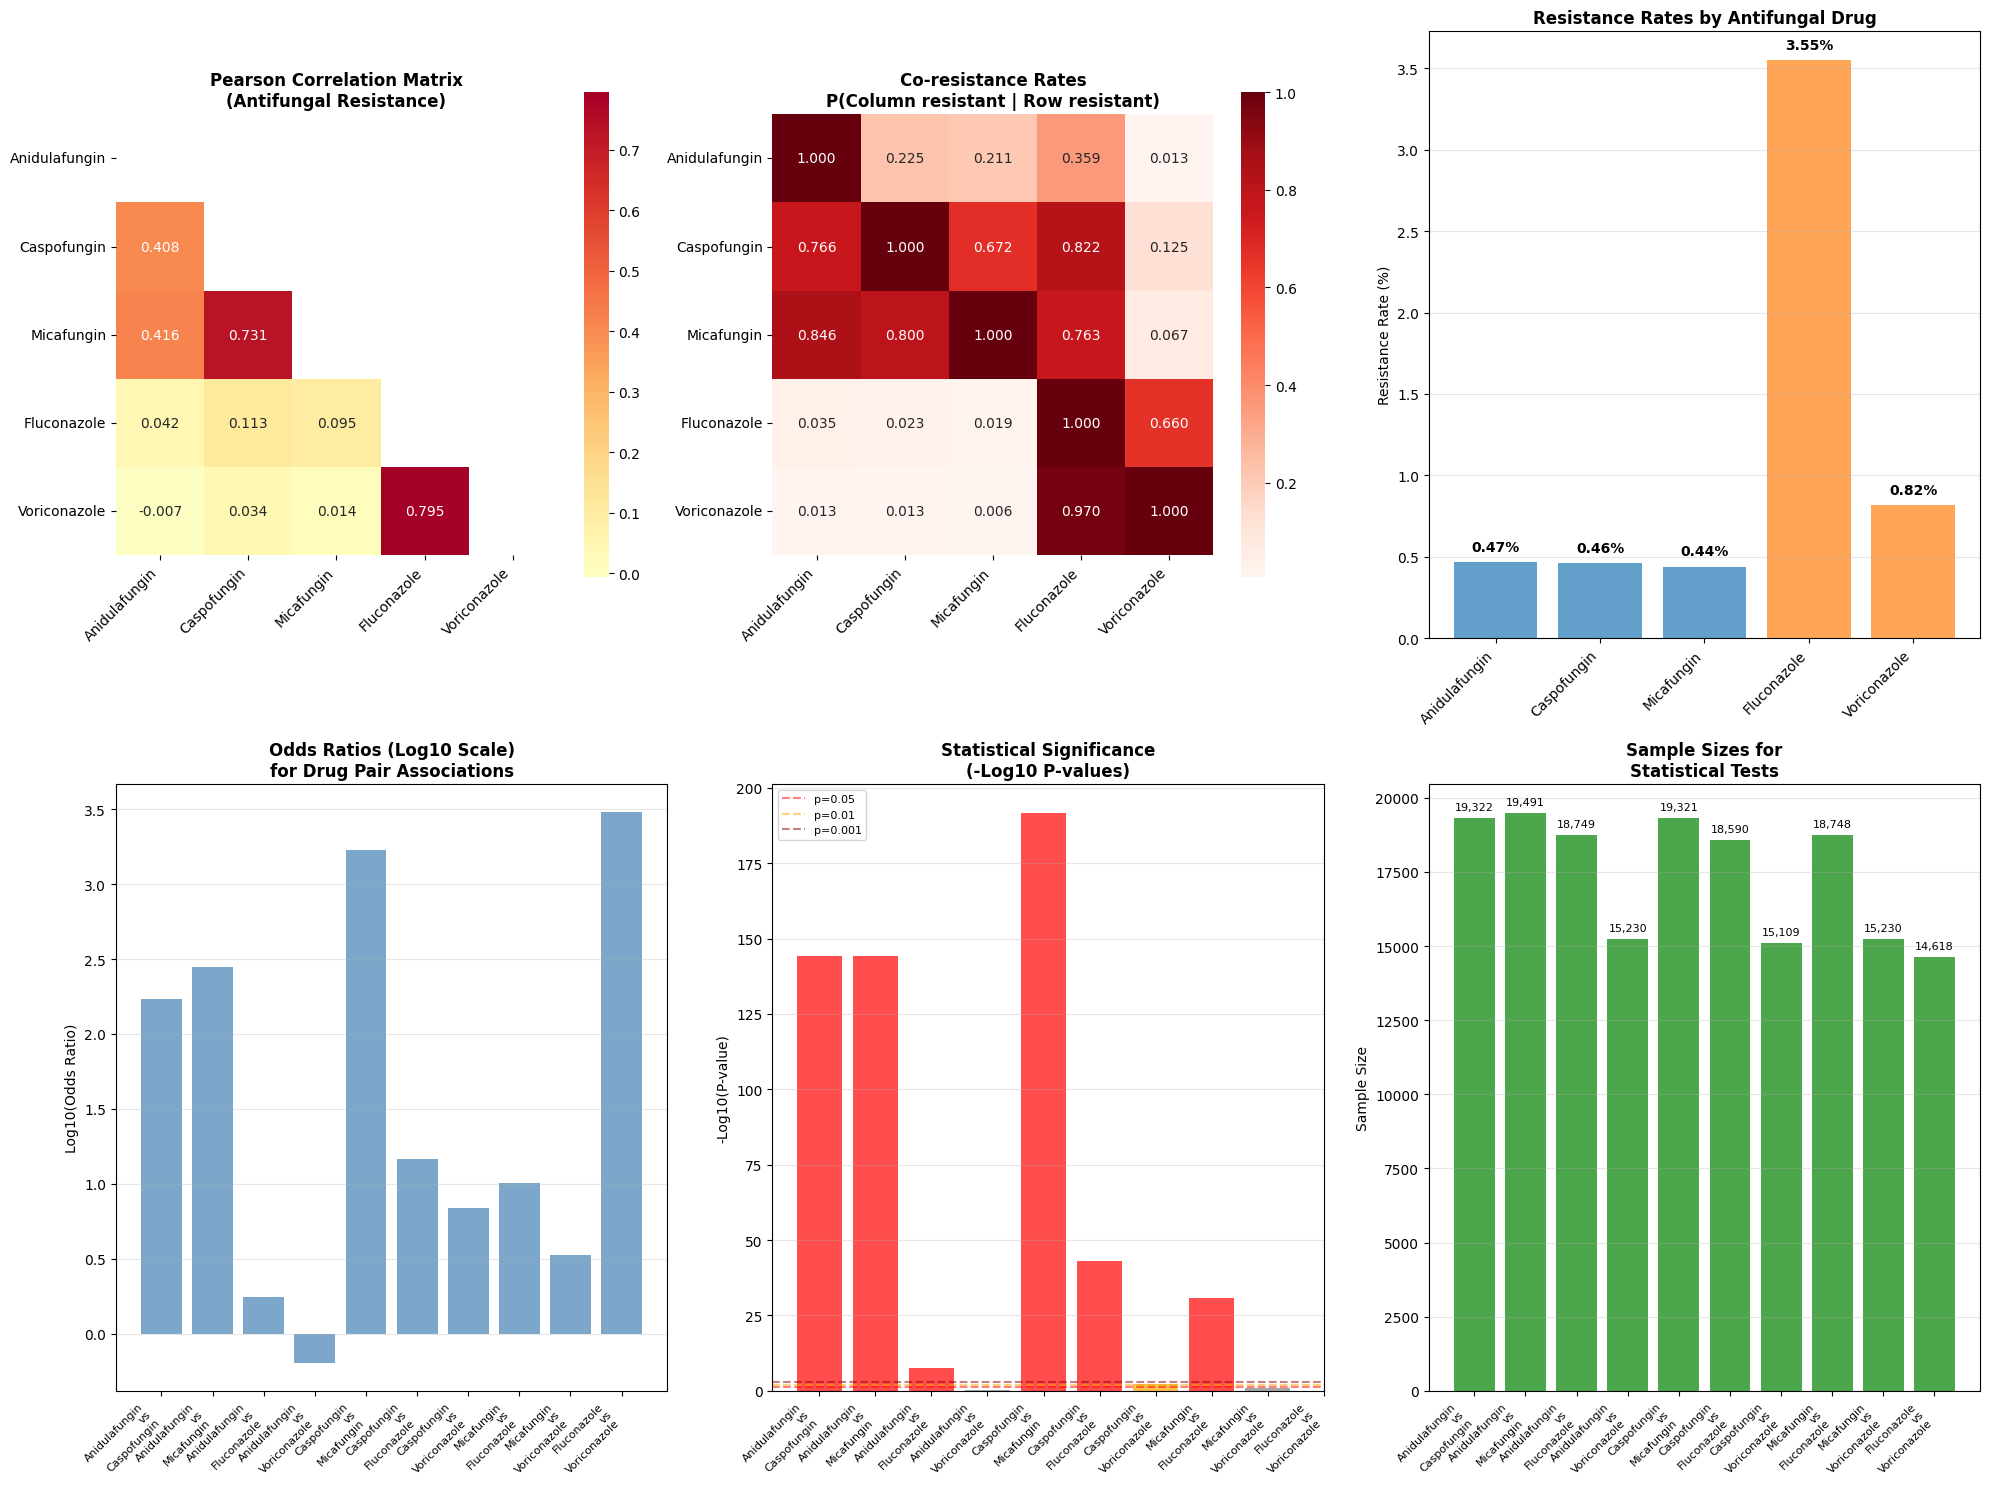

Visualizations created and saved as 'antifungal_co_resistance_analysis.png'


In [61]:
# Create comprehensive visualizations of co-resistance patterns
print("Creating visualizations of co-resistance patterns...")

# Set up the plotting style
plt.style.use('default')
fig = plt.figure(figsize=(20, 15))

# 1. Correlation heatmap
plt.subplot(2, 3, 1)
mask = np.triu(np.ones_like(pearson_corr, dtype=bool))
sns.heatmap(pearson_corr, mask=mask, annot=True, cmap='RdYlBu_r', center=0,
            square=True, fmt='.3f', cbar_kws={"shrink": .8})
plt.title('Pearson Correlation Matrix\n(Antifungal Resistance)', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# 2. Co-resistance rates heatmap
plt.subplot(2, 3, 2)
sns.heatmap(co_resistance_matrix, annot=True, cmap='Reds',
            square=True, fmt='.3f', cbar_kws={"shrink": .8})
plt.title('Co-resistance Rates\nP(Column resistant | Row resistant)', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# 3. Resistance rates by drug class
plt.subplot(2, 3, 3)
echinocandin_rates = [0.47, 0.46, 0.44]  # Anidulafungin, Caspofungin, Micafungin
azole_rates = [3.55, 0.82]  # Fluconazole, Voriconazole
drug_names = ['Anidulafungin', 'Caspofungin', 'Micafungin', 'Fluconazole', 'Voriconazole']
all_rates = echinocandin_rates + azole_rates
colors = ['#1f77b4', '#1f77b4', '#1f77b4', '#ff7f0e', '#ff7f0e']

bars = plt.bar(drug_names, all_rates, color=colors, alpha=0.7)
plt.title('Resistance Rates by Antifungal Drug', fontsize=12, fontweight='bold')
plt.ylabel('Resistance Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, rate in zip(bars, all_rates):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05,
             f'{rate:.2f}%', ha='center', va='bottom', fontweight='bold')

# 4. Odds ratios visualization
plt.subplot(2, 3, 4)
odds_ratios = significance_df['Odds_Ratio'].values
pair_labels = [f"{row['Drug1']}\nvs\n{row['Drug2']}" for _, row in significance_df.iterrows()]

# Log scale for better visualization
log_odds = np.log10(odds_ratios + 1e-10)  # Add small value to handle inf
bars = plt.bar(range(len(odds_ratios)), log_odds, color='steelblue', alpha=0.7)
plt.title('Odds Ratios (Log10 Scale)\nfor Drug Pair Associations', fontsize=12, fontweight='bold')
plt.ylabel('Log10(Odds Ratio)')
plt.xticks(range(len(pair_labels)), pair_labels, rotation=45, ha='right', fontsize=8)
plt.grid(axis='y', alpha=0.3)

# 5. P-values significance plot
plt.subplot(2, 3, 5)
p_values = significance_df['Fisher_pvalue'].values
colors_sig = ['red' if p < 0.001 else 'orange' if p < 0.01 else 'yellow' if p < 0.05 else 'gray'
              for p in p_values]

bars = plt.bar(range(len(p_values)), -np.log10(p_values), color=colors_sig, alpha=0.7)
plt.axhline(y=-np.log10(0.05), color='red', linestyle='--', alpha=0.5, label='p=0.05')
plt.axhline(y=-np.log10(0.01), color='orange', linestyle='--', alpha=0.5, label='p=0.01')
plt.axhline(y=-np.log10(0.001), color='darkred', linestyle='--', alpha=0.5, label='p=0.001')
plt.title('Statistical Significance\n(-Log10 P-values)', fontsize=12, fontweight='bold')
plt.ylabel('-Log10(P-value)')
plt.xticks(range(len(pair_labels)), pair_labels, rotation=45, ha='right', fontsize=8)
plt.legend(fontsize=8)
plt.grid(axis='y', alpha=0.3)

# 6. Sample sizes
plt.subplot(2, 3, 6)
sample_sizes = significance_df['Sample_Size'].values
bars = plt.bar(range(len(sample_sizes)), sample_sizes, color='green', alpha=0.7)
plt.title('Sample Sizes for\nStatistical Tests', fontsize=12, fontweight='bold')
plt.ylabel('Sample Size')
plt.xticks(range(len(pair_labels)), pair_labels, rotation=45, ha='right', fontsize=8)
plt.grid(axis='y', alpha=0.3)

# Add value labels
for bar, size in zip(bars, sample_sizes):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 200,
             f'{size:,}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.savefig('antifungal_co_resistance_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("Visualizations created and saved as 'antifungal_co_resistance_analysis.png'")

In [46]:
# Stratify co-resistance analysis by Candida species
print("SPECIES-STRATIFIED ANTIFUNGAL CO-RESISTANCE ANALYSIS")
print("=" * 60)

# Identify species with sufficient data
species_counts = pd.read_csv('species_counts.csv', index_col = 0).squeeze()
print("Species distribution in dataset:")
for species, count in species_counts.head(10).items():
    print(f"  {species}: {count:,} isolates")

# Select major Candida species with sufficient data (>500 isolates)
major_species = species_counts[species_counts >= 500].index.tolist()
for species in major_species:
    print(f"  - {species}")

# Prepare data for species-stratified analysis
main_drugs = ['Anidulafungin (CLSI)_I_binary', 'Caspofungin (CLSI)_I_binary',
              'Micafungin (CLSI)_I_binary', 'Fluconazole (CLSI)_I_binary',
              'Voriconazole (CLSI)_I_binary']
main_drugs_clean = ['Anidulafungin', 'Caspofungin', 'Micafungin', 'Fluconazole', 'Voriconazole']

# Initialize storage for species-specific results
species_results = {}
species_resistance_rates = {}
species_correlations = {}
species_co_resistance = {}


SPECIES-STRATIFIED ANTIFUNGAL CO-RESISTANCE ANALYSIS
Species distribution in dataset:
  Candida albicans: 9,353 isolates
  Candida glabrata: 4,055 isolates
  Candida parapsilosis: 3,238 isolates
  Candida tropicalis: 2,027 isolates
  Aspergillus fumigatus: 1,928 isolates
  Candida krusei: 612 isolates
  Candida dubliniensis: 476 isolates
  Cryptococcus neoformans var. grubii: 413 isolates
  Candida lusitaniae: 392 isolates
  Aspergillus flavus species complex: 287 isolates
  - Candida albicans
  - Candida glabrata
  - Candida parapsilosis
  - Candida tropicalis
  - Aspergillus fumigatus
  - Candida krusei


In [64]:
# Compute resistance rates, correlations, and co-resistance for each major species
for species in major_species:
    print(f"\n{species.upper()}")
    print("=" * len(species))

    # Filter data for this species
    species_data = complete_data[complete_data['Species'] == species].copy()

    if len(species_data) < 50:  # Skip if too few samples
        print(f"Insufficient data ({len(species_data)} samples)")
        continue

    # Calculate resistance rates
    resistance_rates = {}
    for i, drug in enumerate(main_drugs_clean):
        drug_col = main_drugs[i]
        if drug_col in species_data.columns:
            total_tested = species_data[drug_col].notna().sum()
            resistant_count = species_data[drug_col].sum()
            if total_tested > 0:
                resistance_rate = (resistant_count / total_tested) * 100
                resistance_rates[drug] = {
                    'rate': resistance_rate,
                    'resistant': int(resistant_count),
                    'total': int(total_tested)
                }

    species_resistance_rates[species] = resistance_rates

    # Print resistance rates
    print(f"Sample size: {len(species_data):,}")
    print("Resistance rates:")
    for drug, data in resistance_rates.items():
        print(f"  {drug}: {data['resistant']}/{data['total']} ({data['rate']:.2f}%)")

    # Calculate correlations if sufficient resistant isolates
    correlation_data = species_data[main_drugs].copy()
    correlation_data.columns = main_drugs_clean

    # Only calculate if we have some resistance
    total_resistant = correlation_data.sum().sum()
    if total_resistant >= 5:  # At least 5 resistant isolates total
        try:
            pearson_corr = correlation_data.corr(method='pearson')
            species_correlations[species] = pearson_corr

            # Calculate co-resistance matrix
            co_resistance_matrix = pd.DataFrame(index=main_drugs_clean, columns=main_drugs_clean)

            for drug1 in main_drugs_clean:
                for drug2 in main_drugs_clean:
                    if drug1 != drug2:
                        drug1_resistant = correlation_data[drug1] == 1
                        drug2_resistant = correlation_data[drug2] == 1

                        both_tested = correlation_data[drug1].notna() & correlation_data[drug2].notna()
                        drug1_resistant_tested = drug1_resistant & both_tested
                        both_resistant = drug1_resistant & drug2_resistant & both_tested

                        if drug1_resistant_tested.sum() > 0:
                            co_resistance_rate = both_resistant.sum() / drug1_resistant_tested.sum()
                            co_resistance_matrix.loc[drug1, drug2] = co_resistance_rate
                        else:
                            co_resistance_matrix.loc[drug1, drug2] = 0
                    else:
                        co_resistance_matrix.loc[drug1, drug2] = 1.0

            co_resistance_matrix = co_resistance_matrix.astype(float)
            species_co_resistance[species] = co_resistance_matrix

            print("\nTop correlations:")
            # Get upper triangle of correlation matrix
            mask = np.triu(np.ones_like(pearson_corr, dtype=bool), k=1)
            corr_pairs = []
            for i in range(len(pearson_corr)):
                for j in range(i+1, len(pearson_corr)):
                    if not pd.isna(pearson_corr.iloc[i,j]):
                        corr_pairs.append((pearson_corr.index[i], pearson_corr.columns[j], pearson_corr.iloc[i,j]))

            # Sort by absolute correlation
            corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)
            for drug1, drug2, corr in corr_pairs[:3]:  # Top 3
                if abs(corr) > 0.1:  # Only show meaningful correlations
                    print(f"  {drug1} - {drug2}: {corr:.3f}")

        except Exception as e:
            print(f"  Error calculating correlations: {str(e)}")
    else:
        print("  Insufficient resistance data for correlation analysis")


CANDIDA ALBICANS
Sample size: 9,353
Resistance rates:
  Anidulafungin: 12/9353 (0.13%)
  Caspofungin: 19/9289 (0.20%)
  Micafungin: 16/9353 (0.17%)
  Fluconazole: 42/9353 (0.45%)
  Voriconazole: 23/9353 (0.25%)

Top correlations:
  Caspofungin - Micafungin: 0.918
  Anidulafungin - Micafungin: 0.721
  Anidulafungin - Caspofungin: 0.662

CANDIDA GLABRATA
Sample size: 4,055
Resistance rates:
  Anidulafungin: 150/4055 (3.70%)
  Caspofungin: 99/4006 (2.47%)
  Micafungin: 83/4054 (2.05%)
  Fluconazole: 4055/4055 (100.00%)

Top correlations:
  Caspofungin - Micafungin: 0.731
  Anidulafungin - Caspofungin: 0.693
  Anidulafungin - Micafungin: 0.655

CANDIDA PARAPSILOSIS
Sample size: 3,238
Resistance rates:
  Anidulafungin: 278/3238 (8.59%)
  Caspofungin: 0/3205 (0.00%)
  Micafungin: 7/3238 (0.22%)
  Fluconazole: 318/3238 (9.82%)
  Voriconazole: 200/3238 (6.18%)

Top correlations:
  Fluconazole - Voriconazole: 0.773
  Anidulafungin - Micafungin: 0.104

CANDIDA TROPICALIS
Sample size: 2,027
Resi